In [2]:
from __future__ import print_function

import cobra
import cobra.test
import mackinac
import numpy as np
import csv
import glob
import pickle
import pandas as pd
import time
import sys
from collections import defaultdict
from cobra.medium import minimal_medium
from cobra.flux_analysis import gapfill
from operator import itemgetter
import probanno

In [3]:
# Read in Meta
with open("../Data/Filtered_lacto_genome_ids.data",'rb') as f:
    genome_ids_list = pickle.load(f)
print(genome_ids_list)

['713605.5', '888801.3', '525328.13', '525328.4', '879297.3', '879298.3', '879299.3', '879300.3', '879302.3', '879301.3', '879303.3', '879304.3', '879295.3', '879296.3', '928327.3', '928328.3', '349123.13', '927703.3', '525341.3', '557436.17', '557436.4', '1340495.3', '557433.4', '863368.3', '863369.3', '585517.3', '548485.3', '491077.3', '1598.347', '1598.346', '1598.345', '1598.344', '1598.342', '1598.343', '1598.341', '1598.338', '1598.340', '1598.337', '1598.335', '1598.336', '1598.332', '1598.330', '1598.333', '1598.334', '1598.331', '1598.329', '1598.326', '1598.325', '1598.327', '1598.328', '1598.324', '1598.323', '1598.276', '1598.291', '1598.259', '1598.175', '1598.178', '1598.322', '1598.320', '1598.321', '1598.319', '1598.318', '1598.316', '1598.317', '1598.313', '1598.312', '1598.288', '1598.146', '1598.289', '1598.264', '1598.349', '1598.258', '1598.95', '1598.309', '1598.292', '1598.295', '1598.293', '1598.296', '1598.297', '1598.304', '1598.306', '1598.298', '1598.305', 

In [4]:
len(genome_ids_list)

849

In [5]:
universal = cobra.io.load_json_model("../Data/GramPosUni.json")
likelihood_template = pickle.load(open("/home/bneubert/Lactobacillus/likelihoods/1590.142.probs"))
rxn_ids = []
# read in all possible reactions from universal bag
for reaction in universal.reactions:
    try:
        test = likelihood_template[str(reaction.id)]
        rxn_ids.append(str(reaction.id))
    except:
        print(str(reaction.id) + " not in the probanno bag")
print(len(rxn_ids))
rxn_ids

rxn10561_c not in the probanno bag
rxn09471_c not in the probanno bag
rxn05704_c not in the probanno bag
rxn10496_c not in the probanno bag
rxn11746_c not in the probanno bag
rxn03805_c not in the probanno bag
rxn11291_c not in the probanno bag
rxn13085_c not in the probanno bag
rxn03760_c not in the probanno bag
rxn03720_c not in the probanno bag
rxn08230_c not in the probanno bag
rxn09044_c not in the probanno bag
rxn14312_c not in the probanno bag
rxn10791_c not in the probanno bag
rxn10568_c not in the probanno bag
rxn11891_c not in the probanno bag
rxn05521_c not in the probanno bag
rxn12564_c not in the probanno bag
rxn13549_c not in the probanno bag
rxn11807_c not in the probanno bag
rxn10156_c not in the probanno bag
rxn13446_c not in the probanno bag
rxn11526_c not in the probanno bag
rxn09959_c not in the probanno bag
rxn10115_c not in the probanno bag
rxn12525_c not in the probanno bag
rxn04889_c not in the probanno bag
rxn10449_c not in the probanno bag
rxn08836_c not in th

rxn08395_c not in the probanno bag
rxn09972_c not in the probanno bag
rxn10172_c not in the probanno bag
rxn07153_c not in the probanno bag
rxn05988_c not in the probanno bag
rxn04059_c not in the probanno bag
rxn02383_c not in the probanno bag
rxn09914_c not in the probanno bag
rxn13373_c not in the probanno bag
rxn09045_c not in the probanno bag
rxn03702_c not in the probanno bag
rxn02780_c not in the probanno bag
rxn10745_c not in the probanno bag
rxn13435_c not in the probanno bag
rxn05502_c not in the probanno bag
rxn08597_c not in the probanno bag
rxn12552_c not in the probanno bag
rxn11152_c not in the probanno bag
rxn04480_c not in the probanno bag
rxn12593_c not in the probanno bag
rxn07868_c not in the probanno bag
rxn06784_c not in the probanno bag
rxn05511_c not in the probanno bag
rxn09508_c not in the probanno bag
rxn07860_c not in the probanno bag
rxn08604_c not in the probanno bag
rxn11691_c not in the probanno bag
rxn09443_c not in the probanno bag
rxn10250_c not in th

['rxn00594_c',
 'rxn01087_c',
 'rxn03234_c',
 'rxn01734_c',
 'rxn02282_c',
 'rxn02201_c',
 'rxn02241_c',
 'rxn00351_c',
 'rxn02637_c',
 'rxn05994_c',
 'rxn07431_c',
 'rxn00836_c',
 'rxn02209_c',
 'rxn08977_c',
 'rxn00390_c',
 'rxn06636_c',
 'rxn03946_c',
 'rxn08180_c',
 'rxn01503_c',
 'rxn05318_c',
 'rxn04735_c',
 'rxn07360_c',
 'rxn00749_c',
 'rxn00062_c',
 'rxn01094_c',
 'rxn06472_c',
 'rxn02674_c',
 'rxn08709_c',
 'rxn11567_c',
 'rxn00423_c',
 'rxn10298_c',
 'rxn00364_c',
 'rxn12005_c',
 'rxn00877_c',
 'rxn11625_c',
 'rxn00613_c',
 'rxn05561_c',
 'rxn09126_c',
 'rxn03505_c',
 'rxn01185_c',
 'rxn02367_c',
 'rxn00603_c',
 'rxn03408_c',
 'rxn06671_c',
 'rxn05875_c',
 'rxn00359_c',
 'rxn02177_c',
 'rxn05250_c',
 'rxn01177_c',
 'rxn02415_c',
 'rxn00646_c',
 'rxn05440_c',
 'rxn01780_c',
 'rxn14087_c',
 'rxn00935_c',
 'rxn01673_c',
 'rxn03681_c',
 'rxn03600_c',
 'rxn00247_c',
 'rxn05625_c',
 'rxn03016_c',
 'rxn01632_c',
 'rxn01788_c',
 'rxn02360_c',
 'rxn02342_c',
 'rxn04933_c',
 'rxn02837

In [6]:
len(rxn_ids)

6161

In [4]:
# need to put this stuff in its own file at some point
# Create a csv file with probanopy data
x_dict = pickle.load(open("/home/bneubert/Lactobacillus/Data/rxn_probs.dic"))
x_dict

In [7]:
# use reactions to parse through reaction probabilities of pickles
rxn_dict = {}
count = 0.0
for genome in genome_ids_list:
    try:
        curr_file = open("/home/bneubert/Lactobacillus/likelihoods/"+genome+".probs","rb")
        current_likelihoods = pickle.load(curr_file)
    except:
        print("******************"+genome)
    rxn_dict[genome] = []
    for reaction in rxn_ids:
        try:
            rxn_dict[genome].append(current_likelihoods[reaction])
        except:
#             print(reaction + " not in " + genome)
            rxn_dict[genome].append(0.0)
    count += 1.0
    print(str(count/len(genome_ids_list)*100) +"% done")
    curr_file.close()

0.117785630153% done
0.235571260306% done
0.353356890459% done
0.471142520612% done
0.588928150766% done
0.706713780919% done
0.824499411072% done
0.942285041225% done
1.06007067138% done
1.17785630153% done
1.29564193168% done
1.41342756184% done
1.53121319199% done
1.64899882214% done
1.7667844523% done
1.88457008245% done
2.0023557126% done
2.12014134276% done
2.23792697291% done
2.35571260306% done
2.47349823322% done
2.59128386337% done
2.70906949352% done
2.82685512367% done
2.94464075383% done
3.06242638398% done
3.18021201413% done
3.29799764429% done
3.41578327444% done
3.53356890459% done
3.65135453475% done
3.7691401649% done
3.88692579505% done
4.00471142521% done
4.12249705536% done
4.24028268551% done
4.35806831567% done
4.47585394582% done
4.59363957597% done
4.71142520612% done
4.82921083628% done
4.94699646643% done
5.06478209658% done
5.18256772674% done
5.30035335689% done
5.41813898704% done
5.5359246172% done
5.65371024735% done
5.7714958775% done
5.88928150766% do

48.6454652532% done
48.7632508834% done
48.8810365135% done
48.9988221437% done
49.1166077739% done
49.234393404% done
49.3521790342% done
49.4699646643% done
49.5877502945% done
49.7055359246% done
49.8233215548% done
49.9411071849% done
50.0588928151% done
50.1766784452% done
50.2944640754% done
50.4122497055% done
50.5300353357% done
50.6478209658% done
50.765606596% done
50.8833922261% done
51.0011778563% done
51.1189634865% done
51.2367491166% done
51.3545347468% done
51.4723203769% done
51.5901060071% done
51.7078916372% done
51.8256772674% done
51.9434628975% done
52.0612485277% done
52.1790341578% done
52.296819788% done
52.4146054181% done
52.5323910483% done
52.6501766784% done
52.7679623086% done
52.8857479388% done
53.0035335689% done
53.1213191991% done
53.2391048292% done
53.3568904594% done
53.4746760895% done
53.5924617197% done
53.7102473498% done
53.82803298% done
53.9458186101% done
54.0636042403% done
54.1813898704% done
54.2991755006% done
54.4169611307% done
54.53

97.0553592462% done
97.1731448763% done
97.2909305065% done
97.4087161366% done
97.5265017668% done
97.6442873969% done
97.7620730271% done
97.8798586572% done
97.9976442874% done
98.1154299176% done
98.2332155477% done
98.3510011779% done
98.468786808% done
98.5865724382% done
98.7043580683% done
98.8221436985% done
98.9399293286% done
99.0577149588% done
99.1755005889% done
99.2932862191% done
99.4110718492% done
99.5288574794% done
99.6466431095% done
99.7644287397% done
99.8822143698% done
100.0% done


In [10]:
genome_ids_list[575]

'1590.484'

In [9]:
df = pd.DataFrame.from_dict(rxn_dict,orient='index',columns = rxn_ids)
df.to_csv("/home/bneubert/Lactobacillus/Data/reaction_probabilities.csv")
df

rxn00594_c  rxn01087_c  rxn03234_c  rxn01734_c  rxn02282_c  \
1256213.3         0.0         0.0         0.0         0.0         0.0   
1590.156          0.0         0.0         0.0         0.0         0.0   
1624.26           0.0         0.0         0.0         0.0         0.0   
1624.27           0.0         0.0         0.0         0.0         0.0   
491076.4          0.0         0.0         0.0         0.0         0.0   
1624.28           0.0         0.0         0.0         0.0         0.0   
47770.36          0.0         0.0         0.0         0.0         0.0   
47770.37          0.0         0.0         0.0         0.0         0.0   
1597.27           0.0         0.0         0.0         0.0         0.0   
1597.26           0.0         0.0         0.0         0.0         0.0   
1582.34           0.0         0.0         0.0         0.0         0.0   
1597.20           0.0         0.0         0.0         0.0         0.0   
47770.30          0.0         0.0         0.0         0.0         0.0   
47770.31          0.0         0.0         0.0         0.0         0.0   
1033983.3         0.0         0.0         0.0         0.0         0.0   
1590.152          0.0         0.0         0.0         0.0         0.0   
1597.28           0.0         0.0         0.0         0.0         0.0   
47715.288         0.0         0.0         0.0         0.0         0.0   
649758.3          0.0         0.0         0.0         0.0         0.0   
47715.144         0.0         0.0         0.0         0.0         0.0   
649758.4          0.0         0.0         0.0         0.0         0.0   
1590.366          0.0         0.0         0.0         0.0         0.0   
1590.367          0.0         0.0         0.0         0.0         0.0   
1590.364          0.0         0.0         0.0         0.0         0.0   
1590.365          0.0         0.0         0.0         0.0         0.0   
1590.340          0.0         0.0         0.0         0.0         0.0   
998820.3          0.0         0.0         0.0         0.0         0.0   
83684.4           0.0         0.0         0.0         0.0         0.0   
83684.5           0.0         0.0         0.0         0.0         0.0   
1590.287          0.0         0.0         0.0         0.0         0.0   
...               ...         ...         ...         ...         ...   
47715.143         0.0         0.0         0.0         0.0         0.0   
585520.12         0.0         0.0         0.0         0.0         0.0   
1340495.3         0.0         0.0         0.0         0.0         0.0   
1194971.3         0.0         0.0         0.0         0.0         0.0   
1226675.3         0.0         0.0         0.0         0.0         0.0   
880592.5          0.0         0.0         0.0         0.0         0.0   
1423799.3         0.0         0.0         0.0         0.0         0.0   
1580.87           0.0         0.0         0.0         0.0         0.0   
1613.36           0.0         0.0         0.0         0.0         0.0   
1613.35           0.0         0.0         0.0         0.0         0.0   
525329.3          0.0         0.0         0.0         0.0         0.0   
498216.13         0.0         0.0         0.0         0.0         0.0   
1381119.3         0.0         0.0         0.0         0.0         0.0   
1328309.5         0.0         0.0         0.0         0.0         0.0   
1590.231          0.0         0.0         0.0         0.0         0.0   
1590.213          0.0         0.0         0.0         0.0         0.0   
1590.210          0.0         0.0         0.0         0.0         0.0   
1590.211          0.0         0.0         0.0         0.0         0.0   
1256196.3         0.0         0.0         0.0         0.0         0.0   
1590.217          0.0         0.0         0.0         0.0         0.0   
1590.214          0.0         0.0         0.0         0.0         0.0   
1590.215          0.0         0.0         0.0         0.0         0.0   
47715.278         0.0         0.0         0.0         0.0         0.0

In [4]:
# Read in list of all genomes on PATRIC and list of existing models in folder
with open('../Data/20_species_1023_genomes.csv') as csvfile:
    genome_ids_list = []
    for line in csvfile:
        genome_ids_list.append(line.strip())
len(genome_ids_list)
# models = glob.glob('../gap_models/*.xml')
# models = [x.replace("../gap_models/","").replace(".xml","") for x in models]

1023

In [5]:
# remove bad model
genome_ids_list.remove('1579.60')
# double check that it was removed
len(genome_ids_list)

1022

In [5]:
# Do any ungapfilled models produce lactate?

# Lactate = cpd01022
# D-lactate = cpd00221
# L-lactate = cpd00159
lactate = []
dlactate = []
llactate = []
missing_lactate = []
missing_dlactate = []
missing_llactate = []

for genome_id in genome_ids_list:
    model_file_name = "../gap_models/%s.xml" % (genome_id)
    model = cobra.io.read_sbml_model(model_file_name)
    # Lactate = cpd01022
#     try:
#         metabolite = model.metabolites.get_by_id('cpd01022_c')
#         demand = model.add_boundary(metabolite, type='demand')
#         model.objective = demand
#         obj_val = model.slim_optimize(error_value=0.)
#         if obj_val > 1e-3:
#             lactate.append([genome_id, obj_val])            
#             model.remove_reactions([demand])
#     except:
#         missing_lactate.append(genome_id)
#         pass

    # D-lactate = cpd00221
    try:
        metabolite = model.metabolites.get_by_id('cpd00221_c')
        demand = model.add_boundary(metabolite, type='demand')
        model.objective = demand
        obj_val = model.slim_optimize(error_value=0.)
        if obj_val > 1e-3:
            dlactate.append([genome_id, obj_val])
            model.remove_reactions([demand])
    except:
        missing_dlactate.append(genome_id)
        pass
    # L-lactate = cpd00159
    try:
        metabolite = model.metabolites.get_by_id('cpd00159_c')
        demand = model.add_boundary(metabolite, type='demand')
        model.objective = demand
        obj_val = model.slim_optimize(error_value=0.)
        if obj_val > 1e-3:
            llactate.append([genome_id, obj_val])
            model.remove_reactions([demand])
    except:
        missing_llactate.append(genome_id)
        pass

# print(lactate)
# print('---------------------------------')
print(dlactate)
print('---------------------------------')
print(llactate)
print('---------------------------------')
# print(missing_lactate)
# print('---------------------------------')
print(missing_dlactate)
print('---------------------------------')
print(missing_llactate)

[['891391.3', 1000.0], ['1579.22', 1000.0], ['525306.3', 1000.0], ['1421011.3', 1000.0000000000001], ['1421011.4', 1000.0], ['1226675.3', 1000.0], ['1226677.3', 1000.0], ['1226678.3', 1000.0], ['1423717.5', 1000.0], ['1423717.3', 1000.0], ['1226679.3', 1000.0], ['1226676.3', 1000.0], ['1314884.3', 1000.0], ['272621.13', 1000.0], ['1579.81', 1000.0], ['1579.28', 1000.0], ['1579.49', 1000.0], ['1579.56', 1000.0], ['1579.80', 1000.0], ['1579.33', 1000.0], ['1579.85', 1000.0], ['1579.38', 1000.0], ['1423718.3', 1000.0], ['1601.9', 1000.0], ['1601.5', 1000.0], ['1601.14', 1000.0], ['1601.19', 1000.0], ['1601.11', 1000.0], ['1601.15', 1000.0], ['1601.12', 1000.0], ['1601.17', 1000.0], ['1601.13', 1000.0], ['1601.18', 1000.0], ['1601.10', 1000.0], ['1601.16', 1000.0], ['1601.7', 1000.0], ['1601.6', 1000.0], ['1601.8', 1000.0], ['1384064.3', 1000.0], ['649758.3', 1000.0], ['649758.4', 1000.0], ['387344.15', 1000.0], ['1334191.3', 1000.0], ['1580.50', 1000.0], ['1350467.3', 1000.0], ['1001583.3

In [ ]:
# run test case on the first model producing d-lactate and
# l-lactate
print(dlactate[0])
print(llactate[0])
model_file_name = "../gap_models/%s.xml" % (dlactate[0][0])
model = cobra.io.read_sbml_model(model_file_name)

# d-lactate
metabolite = model.metabolites.get_by_id('cpd00221_c')
demand = model.add_boundary(metabolite, type='demand')
model.objective = demand
dlactate_medium = minimal_medium(model, 1e-3)


for limiting_reaction in dlactate_medium.keys():
    for reaction in model.reactions:
        if(reaction.id == str(limiting_reaction)):
            print('d-lactate ' + limiting_reaction+': '+reaction.name)
model.remove_reactions([demand])

# l-lactate
metabolite = model.metabolites.get_by_id('cpd00159_c')
demand = model.add_boundary(metabolite, type='demand')
model.objective = demand
llactate_medium = minimal_medium(model, 1e-3)


for limiting_reaction in llactate_medium.keys():
    for reaction in model.reactions:
        if(reaction.id == str(limiting_reaction)):
            print('l-lactate ' + limiting_reaction+': '+reaction.name)
model.remove_reactions([demand])




In [6]:
all_limiting_sets = []
dlactate_limiting_dict_sr = {}
dlactate_limiting_dict_tr = {}


for genome in dlactate:
    model_file_name = "../gap_models/%s.xml" % (genome[0])
    model = cobra.io.read_sbml_model(model_file_name)

    # d-lactate
    metabolite = model.metabolites.get_by_id('cpd00221_c')
    demand = model.add_boundary(metabolite, type='demand')
    model.objective = demand
    
    dlactate_limiting_dict_tr[genome[0]] = []
    
    # run 3 times due to multiple solutions of minimal media function
    for i in range(0,3):
        print('====RUN '+str(i+1)+'====')
        dlactate_medium = minimal_medium(model, 1e-3)
        # add to single run dictionary
        if(i is 0):
            dlactate_limiting_dict_sr[genome[0]] = []
            for limiting_reaction in dlactate_medium.keys():
                for reaction in model.reactions:
                    if(reaction.id == str(limiting_reaction)):
                        dlactate_limiting_dict_sr[genome[0]].append(reaction.name)
        
        
        
        limiting_list = []
        for limiting_reaction in dlactate_medium.keys():
            for reaction in model.reactions:
                if(reaction.id == str(limiting_reaction)):
                    print(genome[0] + ' limiting reaction is ' + limiting_reaction+': '+reaction.name)
                    limiting_list.append(reaction.name)
                    dlactate_limiting_dict_tr[genome[0]].append(reaction.name)
                    break

        # if we dont have the exact same set in the all limiting sets list
        if(limiting_list not in all_limiting_sets):
            found = False
            for item in all_limiting_sets:
                # if the new limiting list is the same element-wise but not order-wise add one to all_limiting_set version
                if(set(limiting_list) == set(item)):
                    all_limiting_sets.append(item)
                    found = True
                    break
            # if we did not find a matching set of limiting metabolites in the master list then create new dict key with this set
            if(not found):
                all_limiting_sets.append(limiting_list)

        # if limiting list is already a key in the master dict, simply add one  
        else:
            all_limiting_sets.append(limiting_list)

    model.remove_reactions([demand])
    print('-----------------------------------------------------------------------------')

====RUN 1====
891391.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 2====
891391.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 3====
891391.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
-----------------------------------------------------------------------------
====RUN 1====
1579.22 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2====
1579.22 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 3====
1579.22 limiting reaction is EX_cpd00138_e: D-Mannose exchange
-----------------------------------------------------------------------------
====RUN 1====
525306.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 2====
525306.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 3====
525306.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
-----------------------------------------------------------------------------
====RUN 1====
1421011.3 limiting reaction is EX_cpd00100_e: Glycero

====RUN 1====
1579.80 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1579.80 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 3====
1579.80 limiting reaction is EX_cpd00138_e: D-Mannose exchange
-----------------------------------------------------------------------------
====RUN 1====
1579.33 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1579.33 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1579.33 limiting reaction is EX_cpd00309_e: XAN exchange
1579.33 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1579.33 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1579.33 limiting reaction is EX_cpd00309_e: XAN exchange
1579.33 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1579.85 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1579.85 limiting reaction is EX_cpd00100_e: Glycerol exc

====RUN 1====
1601.18 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1601.18 limiting reaction is EX_cpd00794_e: TRHL exchange
1601.18 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1601.18 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1601.18 limiting reaction is EX_cpd00794_e: TRHL exchange
1601.18 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1601.18 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1601.18 limiting reaction is EX_cpd00794_e: TRHL exchange
1601.18 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1601.10 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1601.10 limiting reaction is EX_cpd00794_e: TRHL exchange
1601.10 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1601.10 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1601.10 limiting reaction is EX_cpd00794_e: TRHL exchange
1601.10 limiting react

====RUN 1====
1580.121 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.121 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 2====
1580.121 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.121 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 3====
1580.121 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.121 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
====RUN 1====
1580.57 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.57 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 2====
1580.57 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.57 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 3====
1580.57 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.57 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchang

1580.129 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.129 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
====RUN 1====
1580.131 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.131 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 2====
1580.131 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.131 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 3====
1580.131 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.131 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
====RUN 1====
1580.133 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.133 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 2====
1580.133 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.1

1580.170 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.170 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 3====
1580.170 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.170 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
====RUN 1====
525310.3 limiting reaction is EX_cpd00550_e: D-Serine exchange
525310.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
525310.3 limiting reaction is EX_cpd00154_e: Xylose exchange
525310.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
525310.3 limiting reaction is EX_cpd00550_e: D-Serine exchange
525310.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
525310.3 limiting reaction is EX_cpd00154_e: Xylose exchange
525310.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
525310.3 limiting reaction is EX_cpd00550_e: D-Serine exchange
525310.3 limiting reaction is EX_

1378069.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1378069.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1378069.5 limiting reaction is EX_cpd00054_e: L-Serine exchange
1378069.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1378069.5 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1378069.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1378069.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1378069.5 limiting reaction is EX_cpd00054_e: L-Serine exchange
1378069.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1378069.5 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1051653.4 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051653.4 limiting reaction is EX_cpd00222_e: GLCN exchange
1051653.4 limiting reaction is EX_cpd00054_e: L-Serine exchange
1051653.4 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051

====RUN 1====
1051655.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051655.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1051655.5 limiting reaction is EX_cpd00054_e: L-Serine exchange
1051655.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051655.5 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1051655.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051655.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1051655.5 limiting reaction is EX_cpd00054_e: L-Serine exchange
1051655.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051655.5 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1051655.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051655.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1051655.5 limiting reaction is EX_cpd00054_e: L-Serine exchange
1051655.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051655.5 limiting reaction is EX_cpd00007_e: O2 exchange
----------

1582.34 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.34 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.34 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.34 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.34 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1582.34 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.34 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.34 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.34 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.34 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1582.35 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.35 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.35 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1582.35 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.35 limiting reaction is EX_cp

====RUN 1====
1582.48 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.48 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.48 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1582.48 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.48 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1582.48 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.48 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.48 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.48 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.48 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1582.48 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.48 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.48 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.48 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.48 limiting reaction is EX_cpd00007_e: O2 exchange
------------------------------------------

====RUN 1====
1582.78 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.78 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.78 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.78 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.78 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1582.78 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.78 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.78 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.78 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.78 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1582.78 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.78 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.78 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.78 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.78 limiting reaction is EX_cpd00007_e: O2 exchange
----------------------------------------

1381118.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1381118.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1381118.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
679188.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
679188.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
679188.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
679188.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
679188.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
679188.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
679188.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
679188.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
679188.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
440496.3 limiting reaction is

47770.64 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
47770.42 limiting reaction is EX_cpd00100_e: Glycerol exchange
47770.42 limiting reaction is EX_cpd00027_e: D-Glucose exchange
47770.42 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.42 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47770.42 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
47770.42 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
47770.44 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.44 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.44 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47770.44 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.44 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.4

====RUN 1====
47770.81 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.81 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.81 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47770.81 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.81 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.81 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47770.81 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.81 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.81 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
47770.82 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.82 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.82 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47770.82 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.82 limiting reaction is E

47770.71 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.71 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.71 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
47770.74 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.74 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.74 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47770.74 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.74 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.74 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47770.74 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.74 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.74 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
47770.70 limiting reaction is EX

====RUN 1====
353496.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
353496.3 limiting reaction is EX_cpd00309_e: XAN exchange
353496.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
353496.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
353496.3 limiting reaction is EX_cpd00309_e: XAN exchange
353496.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
353496.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
353496.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
353496.3 limiting reaction is EX_cpd00309_e: XAN exchange
353496.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
353496.3 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
390333.7 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
390333.7 limiting reaction is EX_cpd00309_e: XAN exchange
390333.7 limiting reaction is EX_cpd00138_e: D-Mannose exchange
39033

1585.18 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1585.18 limiting reaction is EX_cpd00309_e: XAN exchange
1585.18 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1585.17 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1585.17 limiting reaction is EX_cpd00309_e: XAN exchange
1585.17 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1585.17 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1585.17 limiting reaction is EX_cpd00309_e: XAN exchange
1585.17 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1585.17 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1585.17 limiting reaction is EX_cpd00309_e: XAN exchange
1585.17 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1585.21 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2

====RUN 1====
1269760.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2====
1269760.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 3====
1269760.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
-----------------------------------------------------------------------------
====RUN 1====
888027.6 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
888027.6 limiting reaction is EX_cpd00179_e: Maltose exchange
888027.6 limiting reaction is EX_cpd00309_e: XAN exchange
====RUN 2====
888027.6 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
888027.6 limiting reaction is EX_cpd00208_e: LACT exchange
888027.6 limiting reaction is EX_cpd00309_e: XAN exchange
888027.6 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 3====
888027.6 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
888027.6 limiting reaction is EX_cpd00208_e: LACT exchange
888027.6 limiting reaction is EX_cpd00309_e: XAN exchange
888027.6 limiting reaction is 

====RUN 1====
575599.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
575599.3 limiting reaction is EX_cpd00154_e: Xylose exchange
575599.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
575599.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
575599.3 limiting reaction is EX_cpd00154_e: Xylose exchange
575599.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
575599.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
575599.3 limiting reaction is EX_cpd00154_e: Xylose exchange
575599.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1381124.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1381124.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1381124.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1381124.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1381124.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
138

1613.36 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.36 limiting reaction is EX_cpd00154_e: Xylose exchange
1613.36 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1613.165 limiting reaction is EX_cpd00224_e: L-Arabinose exchange
1613.165 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.165 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1613.165 limiting reaction is EX_cpd00224_e: L-Arabinose exchange
1613.165 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.165 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1613.165 limiting reaction is EX_cpd00224_e: L-Arabinose exchange
1613.165 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.165 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1613.166 limiting reaction is EX_cpd00222_e: GLCN ex

====RUN 1====
1613.32 limiting reaction is EX_cpd00224_e: L-Arabinose exchange
1613.32 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.32 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1613.32 limiting reaction is EX_cpd00224_e: L-Arabinose exchange
1613.32 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.32 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1613.32 limiting reaction is EX_cpd00224_e: L-Arabinose exchange
1613.32 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.32 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1613.155 limiting reaction is EX_cpd00080_e: Glycerol-3-phosphate exchange
1613.155 limiting reaction is EX_cpd00064_e: Ornithine exchange
1613.155 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.155 limiting reaction is EX_cpd00130_e: L-Malate exchange
====RUN 2====
1613.155 limiting reaction is EX_cpd00

-----------------------------------------------------------------------------
====RUN 1====
1346615.3 limiting reaction is EX_cpd00100_e: Glycerol exchange
1346615.3 limiting reaction is EX_cpd00208_e: LACT exchange
1346615.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1346615.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1346615.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
630527.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
630527.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
630527.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
679196.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
679196.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
6

326425.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
405566.6 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
405566.6 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
405566.6 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
585520.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
585520.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
585520.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
585520.12 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
585520.12 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
585520.12 limiting reaction is EX_cpd00082_e: D-Fruct

====RUN 1====
1434656.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1434656.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1434656.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1434652.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1434652.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 3====
1434652.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
-----------------------------------------------------------------------------
====RUN 1====
1434653.3 limiting reaction is EX_cpd00179_e: Maltose exchange
1434653.3 limiting reaction is EX_cpd00100_e: Glycerol exchange
1434653.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1434653.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1434653.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-------

====RUN 1====
33959.332 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
33959.332 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
33959.332 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
33959.145 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
33959.145 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
33959.145 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
33959.146 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 2====
33959.146 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
33959.146 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
33959.305 limiting reaction is EX

====RUN 1====
1423771.3 limiting reaction is EX_cpd00033_e: Glycine exchange
1423771.3 limiting reaction is EX_cpd00154_e: Xylose exchange
1423771.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1423771.3 limiting reaction is EX_cpd00033_e: Glycine exchange
1423771.3 limiting reaction is EX_cpd00154_e: Xylose exchange
1423771.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1423771.3 limiting reaction is EX_cpd00033_e: Glycine exchange
1423771.3 limiting reaction is EX_cpd00154_e: Xylose exchange
1423771.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1130798.5 limiting reaction is EX_cpd00100_e: Glycerol exchange
1130798.5 limiting reaction is EX_cpd11589_e: gly-asp-L exchange
1130798.5 limiting reaction is EX_cpd00794_e: TRHL exchange
1130798.5 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1130798.5 limiting reaction is EX_cpd00100_e: Glycerol e

====RUN 1====
152331.26 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.26 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.26 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.26 limiting reaction is EX_cpd00007_e: O2 exchange
152331.26 limiting reaction is EX_cpd00208_e: LACT exchange
====RUN 2====
152331.26 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.26 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.26 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.26 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.26 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
152331.26 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.26 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.26 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.26 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.26 limiting reaction is EX_cpd00007_e: O2 exch

====RUN 1====
152331.21 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.21 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.21 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.21 limiting reaction is EX_cpd00007_e: O2 exchange
152331.21 limiting reaction is EX_cpd00208_e: LACT exchange
====RUN 2====
152331.21 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.21 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.21 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.21 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.21 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
152331.21 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.21 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.21 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.21 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.21 limiting reaction is EX_cpd00007_e: O2 exch

152331.25 limiting reaction is EX_cpd00550_e: D-Serine exchange
152331.25 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.25 limiting reaction is EX_cpd00154_e: Xylose exchange
152331.25 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
152331.25 limiting reaction is EX_cpd00550_e: D-Serine exchange
152331.25 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.25 limiting reaction is EX_cpd00154_e: Xylose exchange
152331.25 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
152331.15 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.15 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.15 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.15 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.15 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
152331.15 limiting reaction is EX_cpd00222_e: GLCN exchange
152

====RUN 1====
1597.17 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.17 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.17 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.17 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.17 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1597.17 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.17 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.17 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.17 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.17 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1597.17 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.17 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.17 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.17 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.17 limiting reaction is EX_cpd00007_e: O2 exchange
----------------------------------------

====RUN 1====
1597.114 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.114 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.114 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.114 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.114 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1597.114 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.114 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.114 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.114 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.114 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1597.114 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.114 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.114 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.114 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.114 limiting reaction is EX_cpd00007_e: O2 exchange
-------------------------

====RUN 1====
1597.46 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.46 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.46 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1597.46 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.46 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1597.46 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.46 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.46 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.46 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.46 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1597.46 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.46 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.46 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.46 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.46 limiting reaction is EX_cpd00007_e: O2 exchange
------------------------------------------

====RUN 1====
525337.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
525337.3 limiting reaction is EX_cpd00222_e: GLCN exchange
525337.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
525337.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
525337.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
525337.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
525337.3 limiting reaction is EX_cpd00222_e: GLCN exchange
525337.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
525337.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
525337.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
525337.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
525337.3 limiting reaction is EX_cpd00222_e: GLCN exchange
525337.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
525337.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
525337.3 limiting reaction is EX_cpd00007_e: O2 exchange
-------------------------

1256218.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256218.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256218.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256218.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256218.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1256218.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256218.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256218.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256218.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256218.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1256201.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256201.3 limiting reaction is EX_cpd00179_e: Maltose exchange
1256201.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1256201.3 limiting reaction is EX_cpd00179_e: Maltose exchang

====RUN 1====
1256209.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256209.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256209.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1256209.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256209.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256209.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1256209.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256209.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256209.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1256224.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256224.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256224.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1256224.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256224.3 limiting reaction is EX_

====RUN 1====
1256208.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256208.3 limiting reaction is EX_cpd00208_e: LACT exchange
1256208.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1256208.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256208.3 limiting reaction is EX_cpd00208_e: LACT exchange
1256208.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1256208.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256208.3 limiting reaction is EX_cpd00208_e: LACT exchange
1256208.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1256212.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256212.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256212.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256212.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256212.3 limiting reaction is EX_cpd00007_e: O2 exchange
====

1256199.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256199.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256199.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1256199.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256199.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1256199.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256199.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256199.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1256199.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256199.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1423830.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423830.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1423830.3 limiting reaction is EX_cpd00179_e: Maltose exchange
1423830.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1423830.3 lim

====RUN 1====
1304889.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1304889.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1304889.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1304889.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1304889.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1304889.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1304889.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1304889.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1304889.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1300221.4 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1300221.4 limiting reaction is EX_cpd00179_e: Maltose exchange
1300221.4 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1300221.4 limiting reaction is EX_cpd00179_e: Maltose exchange
1300221.4 limiting reaction is EX_cpd00588_e: Sorb

1590.349 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.349 limiting reaction is EX_cpd00007_e: O2 exchange
1590.349 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1590.349 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.349 limiting reaction is EX_cpd00007_e: O2 exchange
1590.349 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.191 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.191 limiting reaction is EX_cpd00007_e: O2 exchange
1590.191 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.191 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.191 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.191 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.191 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.191 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.191 limiting reaction

====RUN 1====
1590.549 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.549 limiting reaction is EX_cpd00007_e: O2 exchange
1590.549 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.549 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.549 limiting reaction is EX_cpd00007_e: O2 exchange
1590.549 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1590.549 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.549 limiting reaction is EX_cpd00007_e: O2 exchange
1590.549 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.468 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.468 limiting reaction is EX_cpd00007_e: O2 exchange
1590.468 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.468 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.468 limiting reaction is EX_cpd00007_e: O2 exchange
1590.468 limit

1590.202 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.202 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.202 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.202 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.202 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.167 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.167 limiting reaction is EX_cpd00007_e: O2 exchange
1590.167 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.167 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.167 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.167 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.167 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.167 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.167 limiting reaction is EX_cpd00007_e: O2 exchange
----------------------------

====RUN 1====
1590.199 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.199 limiting reaction is EX_cpd00179_e: Maltose exchange
1590.199 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.199 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.199 limiting reaction is EX_cpd00179_e: Maltose exchange
1590.199 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.199 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.199 limiting reaction is EX_cpd00179_e: Maltose exchange
1590.199 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.197 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.197 limiting reaction is EX_cpd00007_e: O2 exchange
1590.197 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.197 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.197 limiting reaction is EX_cpd00794_e: TRHL exchan

====RUN 1====
1590.618 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.618 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.618 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.618 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.618 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.618 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.618 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.618 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.618 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.604 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.604 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.604 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.604 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.604 limiting reaction is EX_cpd00007_e: O2 exchange
1590.604 l

====RUN 1====
1590.350 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.350 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.350 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.350 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.350 limiting reaction is EX_cpd00007_e: O2 exchange
1590.350 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1590.350 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.350 limiting reaction is EX_cpd00007_e: O2 exchange
1590.350 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.307 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.307 limiting reaction is EX_cpd00007_e: O2 exchange
1590.307 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.307 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.307 limiting reaction is EX_cpd00007_e: O2 exchange
1590.307

====RUN 1====
1590.485 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.485 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.485 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.485 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.485 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.485 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.485 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.485 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.485 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.585 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.585 limiting reaction is EX_cpd00007_e: O2 exchange
1590.585 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.585 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.585 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.585

====RUN 1====
1590.338 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.338 limiting reaction is EX_cpd00179_e: Maltose exchange
1590.338 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.338 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.338 limiting reaction is EX_cpd00179_e: Maltose exchange
1590.338 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.338 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.338 limiting reaction is EX_cpd00179_e: Maltose exchange
1590.338 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.267 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.267 limiting reaction is EX_cpd00007_e: O2 exchange
1590.267 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.267 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.267 limiting reaction is EX_cpd00794_e: TRHL exch

====RUN 1====
1590.233 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.233 limiting reaction is EX_cpd00007_e: O2 exchange
1590.233 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.233 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.233 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.233 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.233 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.233 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.233 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.234 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.234 limiting reaction is EX_cpd00007_e: O2 exchange
1590.234 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.234 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.234 limiting reaction is EX_cpd00007_e: O2 exchange
1590.234 limit

1590.208 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.208 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.208 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.208 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.208 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.208 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.209 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.209 limiting reaction is EX_cpd00007_e: O2 exchange
1590.209 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.209 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.209 limiting reaction is EX_cpd00007_e: O2 exchange
1590.209 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1590.209 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.209 limiting reaction is EX_cpd00007_e: O2 exchange
1590.209 limiting reacti

====RUN 1====
1590.221 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.221 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.221 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.221 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.221 limiting reaction is EX_cpd00007_e: O2 exchange
1590.221 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1590.221 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.221 limiting reaction is EX_cpd00007_e: O2 exchange
1590.221 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.220 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.220 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.220 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.220 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.220 limiting reaction is EX_cpd00007_e: O2 exchange
1590.220 l

====RUN 1====
1590.329 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.329 limiting reaction is EX_cpd00007_e: O2 exchange
1590.329 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.329 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.329 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.329 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.329 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.329 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.329 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.331 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.331 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.331 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.331 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.331 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.331 l

====RUN 1====
1590.367 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.367 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.367 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.367 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.367 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.367 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.367 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.367 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.367 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.384 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.384 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.384 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.384 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.384 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.384 limit

1590.623 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.623 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.623 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.623 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.623 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.623 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.364 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.364 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.364 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.364 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.364 limiting reaction is EX_cpd00007_e: O2 exchange
1590.364 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1590.364 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.364 limiting reaction is EX_cpd00007_e: O2 exchange
1590.364 limiting reaction i

====RUN 1====
1590.374 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.374 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.374 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.374 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.374 limiting reaction is EX_cpd00007_e: O2 exchange
1590.374 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1590.374 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.374 limiting reaction is EX_cpd00007_e: O2 exchange
1590.374 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.375 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.375 limiting reaction is EX_cpd00007_e: O2 exchange
1590.375 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.375 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.375 limiting reaction is EX_cpd00794_e: TRHL exchange
1590

====RUN 1====
1590.147 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.147 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.147 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.147 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.147 limiting reaction is EX_cpd00007_e: O2 exchange
1590.147 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1590.147 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.147 limiting reaction is EX_cpd00007_e: O2 exchange
1590.147 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.348 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.348 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.348 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.348 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.348 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.348 lim

====RUN 1====
1423831.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423831.3 limiting reaction is EX_cpd00007_e: O2 exchange
1423831.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1423831.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423831.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1423831.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1423831.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423831.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1423831.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
525338.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
525338.3 limiting reaction is EX_cpd00007_e: O2 exchange
525338.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
525338.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
525338.3 limiting reaction is EX_cpd00007_e: O2 exchange

1390373.4 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1390373.4 limiting reaction is EX_cpd00007_e: O2 exchange
1390373.4 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1390373.4 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1390373.4 limiting reaction is EX_cpd00007_e: O2 exchange
1390373.4 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1350466.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1350466.3 limiting reaction is EX_cpd00007_e: O2 exchange
1350466.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1350466.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1350466.3 limiting reaction is EX_cpd00007_e: O2 exchange
1350466.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1350466.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1350466.3 limiting reaction is EX_cpd00007_e: O2 exchange
1350466.3 

1598.342 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.343 limiting reaction is EX_cpd00108_e: Galactose exchange
====RUN 2====
1598.343 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.343 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.341 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.341 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.341 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.338 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2====
1598.338 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.338 limiting reaction is EX_cpd00082_e: D-Fructose e

====RUN 1====
1598.176 limiting reaction is EX_cpd00108_e: Galactose exchange
====RUN 2====
1598.176 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 3====
1598.176 limiting reaction is EX_cpd00027_e: D-Glucose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.178 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.178 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.178 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.322 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2====
1598.322 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.322 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.320 limiting reaction is EX_cpd00082_e: 

1598.304 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.304 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.306 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.306 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 3====
1598.306 limiting reaction is EX_cpd00027_e: D-Glucose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.298 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.298 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 3====
1598.298 limiting reaction is EX_cpd00027_e: D-Glucose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.305 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.305 limiting reaction is EX_cpd00082_e: D-Fructose exc

1408180.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1408180.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1408180.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
1002365.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1002365.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1002365.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
1002365.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1002365.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1002365.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
1002365.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1002365.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1002365.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
1088720.3 li

1300223.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1300223.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1300223.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1300223.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1300223.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1390386.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1390386.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1390386.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1390386.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1390386.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1390386.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1390386.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1390386.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1390386.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1390

1203258.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1203258.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1203258.5 limiting reaction is EX_cpd01171_e: Dulcose exchange
1203258.5 limiting reaction is EX_cpd00054_e: L-Serine exchange
1203258.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1203258.5 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1203259.4 limiting reaction is EX_cpd00222_e: GLCN exchange
1203259.4 limiting reaction is EX_cpd01171_e: Dulcose exchange
1203259.4 limiting reaction is EX_cpd00054_e: L-Serine exchange
1203259.4 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1203259.4 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1203259.4 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1203259.4 limiting reaction is EX_cpd00222_e: GLCN exchange
1203259.4 limiting reaction is EX_cpd00054_e: L-Serine exchange
1203259.4 li

47715.88 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.88 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.88 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.88 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.88 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.88 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.88 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.88 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.88 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.100 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.100 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.100 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.100 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.100 limiting reaction is EX_cpd00007_e: O2 ex

47715.110 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.110 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.110 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.110 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.110 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47715.110 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.110 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.110 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.110 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.110 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.111 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.111 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.111 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.111 limiting reaction is EX_cpd00314_e: D-Mannit

====RUN 1====
47715.245 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.245 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.245 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.245 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.245 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.245 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.245 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.245 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.245 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.211 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.211 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.211 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.211 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.211 

47715.90 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.90 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.90 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.90 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.90 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.90 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.331 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.331 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.331 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.331 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.331 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.331 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.331 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.331 limiting reaction is

47715.91 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.91 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.91 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.94 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.94 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.94 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.94 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.94 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47715.94 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.94 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.94 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.94 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.94 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47715.94 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47

47715.168 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.168 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.168 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.168 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.168 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.168 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.167 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.167 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.167 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.167 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.167 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47715.167 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.167 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.167 limiting reaction is EX_cpd00588_e: Sorbit

====RUN 1====
47715.144 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.144 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.144 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.144 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.144 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47715.144 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.144 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.144 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.144 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.144 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47715.144 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.144 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.144 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.144 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.144 limiting reaction is EX_cpd00007_e: O2 exchange
----------

47715.140 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.140 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.140 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.140 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.140 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.140 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.139 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.139 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.139 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.139 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.139 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47715.139 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.139 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.139 limiting reaction is EX_cpd00054_e: L-Seri

====RUN 1====
47715.281 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.281 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.281 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.281 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.281 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47715.281 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.281 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.281 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.281 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.281 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47715.281 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.281 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.281 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.281 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.281 limiting reaction is EX_cpd00007_e: O2 exchange
----------

47715.137 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.137 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.137 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.137 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.137 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.137 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.276 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.276 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.276 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.276 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.276 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.276 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.276 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.276 limiting react

1623.11 limiting reaction is EX_cpd00100_e: Glycerol exchange
1623.11 limiting reaction is EX_cpd00007_e: O2 exchange
1623.11 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1623.15 limiting reaction is EX_cpd00100_e: Glycerol exchange
1623.15 limiting reaction is EX_cpd00007_e: O2 exchange
1623.15 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1623.15 limiting reaction is EX_cpd00100_e: Glycerol exchange
1623.15 limiting reaction is EX_cpd00007_e: O2 exchange
1623.15 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1623.15 limiting reaction is EX_cpd00100_e: Glycerol exchange
1623.15 limiting reaction is EX_cpd00007_e: O2 exchange
1623.15 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1623.14 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1623.1

====RUN 1====
1194971.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1194971.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1194971.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1194971.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1194971.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1194971.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1194971.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1194971.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1194971.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.72 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.72 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.72 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1624.72 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1624.72 limiting reaction is EX_cpd00794_e: TRHL exchange
16

1624.112 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.112 limiting reaction is EX_cpd00007_e: O2 exchange
1624.112 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.113 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1624.113 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.113 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1624.113 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.113 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.113 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1624.113 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.113 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.113 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.66 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
16

1624.56 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.56 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.56 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.55 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.55 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.55 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1624.55 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.55 limiting reaction is EX_cpd00007_e: O2 exchange
1624.55 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1624.55 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.55 limiting reaction is EX_cpd00007_e: O2 exchange
1624.55 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.54 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.54 limi

1624.86 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1624.86 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.86 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.86 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.88 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.88 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.88 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1624.88 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.88 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.88 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1624.88 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.88 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.88 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.9

1624.99 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.99 limiting reaction is EX_cpd00007_e: O2 exchange
1624.99 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.100 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.100 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.100 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1624.100 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.100 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.100 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1624.100 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.100 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.100 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.51 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
162

In [7]:
dlactate_limiting_dict_sr_copy = dict(dlactate_limiting_dict_sr)
dlactate_limiting_dict_sr_copy

{'1256213.3': ['GLCN exchange',
  'L-Serine exchange',
  'Sorbitol exchange',
  'Maltohexaose exchange',
  'O2 exchange'],
 '1582.99': ['D-Mannitol exchange',
  'GLCN exchange',
  'L-Serine exchange',
  'Maltohexaose exchange',
  'O2 exchange'],
 '1624.26': ['D-Mannitol exchange', 'TRHL exchange', 'O2 exchange'],
 '1624.27': ['D-Mannitol exchange', 'TRHL exchange', 'O2 exchange'],
 '491076.4': ['D-Mannitol exchange', 'Maltohexaose exchange', 'O2 exchange'],
 '1624.28': ['Sorbitol exchange', 'TRHL exchange', 'O2 exchange'],
 '1256198.3': ['D-Mannitol exchange',
  'GLCN exchange',
  'L-Serine exchange',
  'Maltohexaose exchange',
  'O2 exchange'],
 '47770.36': ['D-Mannitol exchange', 'Maltohexaose exchange', 'O2 exchange'],
 '47770.37': ['D-Fructose exchange'],
 '47770.34': ['D-Mannitol exchange', 'Maltohexaose exchange', 'O2 exchange'],
 '1582.33': ['D-Mannitol exchange', 'Ornithine exchange', 'L-Serine exchange'],
 '1582.34': ['D-Mannitol exchange',
  'GLCN exchange',
  'L-Serine excha

In [8]:
dlactate_limiting_dict_tr_copy = dict(dlactate_limiting_dict_tr)
dlactate_limiting_dict_tr_copy

{'1256213.3': ['GLCN exchange',
  'L-Serine exchange',
  'Sorbitol exchange',
  'Maltohexaose exchange',
  'O2 exchange',
  'D-Mannitol exchange',
  'GLCN exchange',
  'L-Serine exchange',
  'Maltohexaose exchange',
  'O2 exchange',
  'D-Mannitol exchange',
  'GLCN exchange',
  'L-Serine exchange',
  'Maltohexaose exchange',
  'O2 exchange'],
 '1582.99': ['D-Mannitol exchange',
  'GLCN exchange',
  'L-Serine exchange',
  'Maltohexaose exchange',
  'O2 exchange',
  'D-Mannitol exchange',
  'GLCN exchange',
  'L-Serine exchange',
  'Maltohexaose exchange',
  'O2 exchange',
  'D-Mannitol exchange',
  'GLCN exchange',
  'L-Serine exchange',
  'Maltohexaose exchange',
  'O2 exchange'],
 '1624.26': ['D-Mannitol exchange',
  'TRHL exchange',
  'O2 exchange',
  'D-Mannitol exchange',
  'TRHL exchange',
  'O2 exchange',
  'D-Mannitol exchange',
  'TRHL exchange',
  'O2 exchange'],
 '1624.27': ['D-Mannitol exchange',
  'TRHL exchange',
  'O2 exchange',
  'D-Mannitol exchange',
  'O2 exchange',
 

In [9]:
dlactate_limiting_dict_sr = dict(dlactate_limiting_dict_sr_copy)
dlactate_limiting_dict_tr = dict(dlactate_limiting_dict_tr_copy)

In [10]:
sr_limiting_metabolites = []
tr_limiting_metabolites = []

# fill master list of single run metabolites
for genome,metabolites in dlactate_limiting_dict_sr.items():
    for metabolite in metabolites:
        if(metabolite not in sr_limiting_metabolites):
            sr_limiting_metabolites.append(metabolite)
            
# fill master list of triple run metabolites
for genome,metabolites in dlactate_limiting_dict_tr.items():
    for metabolite in metabolites:
        if(metabolite not in tr_limiting_metabolites):
            tr_limiting_metabolites.append(metabolite)
            
# Create default lists of 0s of length corresponding to how many
# limiting metabolites there are
sr_default = []
tr_default = []

for i in range(0,len(sr_limiting_metabolites)):
    sr_default.append(0)
    
for i in range(0,len(tr_limiting_metabolites)):
    tr_default.append(0)
    
            
            
# convert values of the limiting dict to an array of 0s and 1s
# corresponding to the presence of a limiting metabolite or not
# index position is referenced from sr_limiting_metabolites list
for genome,metabolites in dlactate_limiting_dict_sr.items():
    temp = list(sr_default)
    for metabolite in metabolites:
        temp[sr_limiting_metabolites.index(metabolite)] = 1
    dlactate_limiting_dict_sr[genome] = temp
    
for genome,metabolites in dlactate_limiting_dict_tr.items():
    temp = list(tr_default)
    for metabolite in metabolites:
        temp[tr_limiting_metabolites.index(metabolite)] += 1
    dlactate_limiting_dict_tr[genome] = temp


df_sr = pd.DataFrame.from_dict(dlactate_limiting_dict_sr,orient='index')
df_tr = pd.DataFrame.from_dict(dlactate_limiting_dict_tr,orient='index')

df_sr.columns = sr_limiting_metabolites
df_tr.columns = tr_limiting_metabolites

In [11]:
df_sr

GLCN exchange  L-Serine exchange  Sorbitol exchange  \
1256213.3              1                  1                  1   
1590.156               0                  0                  1   
1624.26                0                  0                  0   
1624.27                0                  0                  0   
491076.4               0                  0                  0   
1624.28                0                  0                  1   
1256198.3              1                  1                  0   
47770.36               0                  0                  0   
47770.37               0                  0                  0   
47770.34               0                  0                  0   
1582.33                0                  1                  0   
1582.34                1                  1                  0   
1582.35                1                  1                  1   
47770.30               0                  0                  0   
47770.31               0                  0                  0   
1624.45                0                  0                  0   
1033983.3              0                  0                  0   
1590.152               0                  0                  1   
1256215.3              1                  1                  1   
1597.28                1                  1                  0   
649758.3               0                  0                  0   
47715.310              1                  0                  0   
649758.4               0                  0                  0   
1590.366               0                  0                  0   
947827.8               0                  0                  0   
1590.364               0                  0                  0   
1590.365               0                  0                  1   
1590.289               0                  0                  0   
998820.3               1                  1                  1   
83684.4                0                  0                  0   
...                  ...                ...                ...   
1284223.3              0                  0                  1   
1580.87                0                  0                  0   
1613.32                0                  1                  0   
1613.36                0                  1                  0   
1613.35                0                  0                  0   
1613.34                0                  1                  0   
1590.384               0                  0                  1   
498216.13              1                  1                  1   
1381119.3              0                  0                  0   
1328309.5              0                  0                  0   
1590.212               0                  0                  1   
1590.213               0                  0                  0   
1590.210               0                  0                  1   
1590.211               0                  0                  1   
1256196.3              1                  1                  1   
1590.217               0                  0                  0   
1590.214               0                  0                  0   
1590.215               0                  0                  1   
47715.278              1                  1                  1   
47715.279              1                  1                  1   
1590.218               0                  0                  1   
1590.219               0                  0                  0   
1256229.3              1                  1                  0   
47770.66               0                  0                  0   
525329.3               0                  0                  0   
1203258.5              1                  1                  1   
321967.11              1                  1                  0   
47770.33               0                  0                  0   
1435040.3              1                  1        

In [12]:
df_tr

GLCN exchange  L-Serine exchange  Sorbitol exchange  \
1256213.3              3                  3                  1   
1590.156               0                  0                  1   
1624.26                0                  0                  0   
1624.27                0                  0                  0   
491076.4               0                  0                  0   
1624.28                0                  0                  1   
1256198.3              3                  3                  0   
47770.36               0                  0                  0   
47770.37               0                  0                  0   
47770.34               0                  0                  0   
1582.33                0                  3                  0   
1582.34                3                  3                  0   
1582.35                3                  3                  3   
47770.30               0                  0                  0   
47770.31               0                  0                  0   
1624.45                0                  0                  0   
1033983.3              0                  0                  0   
1590.152               0                  0                  3   
1256215.3              3                  3                  1   
1597.28                3                  3                  0   
649758.3               0                  0                  0   
47715.310              3                  0                  0   
649758.4               0                  0                  0   
1590.366               0                  0                  0   
947827.8               0                  0                  0   
1590.364               0                  0                  2   
1590.365               0                  0                  1   
1590.289               0                  0                  0   
998820.3               3                  3                  1   
83684.4                0                  0                  0   
...                  ...                ...                ...   
1284223.3              0                  0                  1   
1580.87                0                  0                  0   
1613.32                0                  3                  0   
1613.36                0                  3                  0   
1613.35                0                  0                  0   
1613.34                0                  3                  0   
1590.384               0                  0                  3   
498216.13              3                  3                  1   
1381119.3              0                  0                  0   
1328309.5              0                  0                  0   
1590.212               0                  0                  1   
1590.213               0                  0                  0   
1590.210               0                  0                  1   
1590.211               0                  0                  1   
1256196.3              3                  3                  3   
1590.217               0                  0                  0   
1590.214               0                  0                  0   
1590.215               0                  0                  3   
47715.278              3                  3                  1   
47715.279              3                  3                  3   
1590.218               0                  0                  3   
1590.219               0                  0                  2   
1256229.3              3                  3                  2   
47770.66               0                  0                  0   
525329.3               0                  0                  0   
1203258.5              3                  3                  1   
321967.11              3                  3                  0   
47770.33               0                  0                  0   
1435040.3              3                  3        

In [13]:
df_sr.to_pickle('/home/bneubert/Lactobacillus/Data/limiting_metabolite_matrix_sr.pd')
df_tr.to_pickle('/home/bneubert/Lactobacillus/Data/limiting_metabolite_matrix_tr.pd')

In [2]:
unpickled_df_sr = pd.read_pickle('/home/bneubert/Lactobacillus/Data/limiting_metabolite_matrix_sr.pd')
unpickled_df_tr = pd.read_pickle('/home/bneubert/Lactobacillus/Data/limiting_metabolite_matrix_tr.pd')

In [4]:
unpickled_df_sr.to_csv("/home/bneubert/Lactobacillus/Data/limiting_metabolite_single.csv")
unpickled_df_tr.to_csv("/home/bneubert/Lactobacillus/Data/limiting_metabolite_triple.csv")

In [3]:
unpickled_df_tr

GLCN exchange  L-Serine exchange  Sorbitol exchange  \
1256213.3              3                  3                  1   
1590.156               0                  0                  1   
1624.26                0                  0                  0   
1624.27                0                  0                  0   
491076.4               0                  0                  0   
1624.28                0                  0                  1   
1256198.3              3                  3                  0   
47770.36               0                  0                  0   
47770.37               0                  0                  0   
47770.34               0                  0                  0   
1582.33                0                  3                  0   
1582.34                3                  3                  0   
1582.35                3                  3                  3   
47770.30               0                  0                  0   
47770.31               0                  0                  0   
1624.45                0                  0                  0   
1033983.3              0                  0                  0   
1590.152               0                  0                  3   
1256215.3              3                  3                  1   
1597.28                3                  3                  0   
649758.3               0                  0                  0   
47715.310              3                  0                  0   
649758.4               0                  0                  0   
1590.366               0                  0                  0   
947827.8               0                  0                  0   
1590.364               0                  0                  2   
1590.365               0                  0                  1   
1590.289               0                  0                  0   
998820.3               3                  3                  1   
83684.4                0                  0                  0   
...                  ...                ...                ...   
1284223.3              0                  0                  1   
1580.87                0                  0                  0   
1613.32                0                  3                  0   
1613.36                0                  3                  0   
1613.35                0                  0                  0   
1613.34                0                  3                  0   
1590.384               0                  0                  3   
498216.13              3                  3                  1   
1381119.3              0                  0                  0   
1328309.5              0                  0                  0   
1590.212               0                  0                  1   
1590.213               0                  0                  0   
1590.210               0                  0                  1   
1590.211               0                  0                  1   
1256196.3              3                  3                  3   
1590.217               0                  0                  0   
1590.214               0                  0                  0   
1590.215               0                  0                  3   
47715.278              3                  3                  1   
47715.279              3                  3                  3   
1590.218               0                  0                  3   
1590.219               0                  0                  2   
1256229.3              3                  3                  2   
47770.66               0                  0                  0   
525329.3               0                  0                  0   
1203258.5              3                  3                  1   
321967.11              3                  3                  0   
47770.33               0                  0                  0   
1435040.3              3                  3        

In [44]:
# limiting metabolites heat map
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

y= []
for i in unpickled_df_sr.index.tolist():
    y.append('g'+str(i))
    
x = []
for i in unpickled_df_sr.columns.tolist():
    x.append(i[:len(i)-8])

trace = go.Heatmap(z=unpickled_df_sr.values.tolist(),
                   x=x,
                   y=y)
data=[trace]
layout = go.Layout(
    title= 'Limiting Metabolites in d-Lactate Production',
    xaxis=dict(
        title='Limiting Metabolite',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Lactobacillus Genome Id',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)


plotly.offline.plot(fig, filename='/home/bneubert/Lactobacillus/Data/limiting-metabolites-heatmap.html')

'file:///mnt/c/Users/Ben Neubert/Desktop/limiting-metabolites-heatmap.html'

Automatically created module for IPython interactive environment
<type 'numpy.ndarray'>


/home/bneubert/.virtualenvs/mackinac/lib/python2.7/site-packages/ipykernel_launcher.py:61 RuntimeWarning: divide by zero encountered in divide


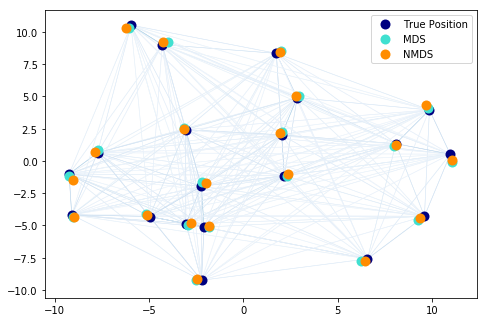

In [18]:
# Ordination

print(__doc__)
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA


n_samples = 20 # number of data points
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)# generate 40 floats [0,20), 40 since 2 coords and 20 points
X_true = X_true.reshape((n_samples, 2)) # change list to a list of coordinates essentially
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true) # similarity matrix used by mds algorithm that it will use to try and maintain distances based upon

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise
print(type(similarities))

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,
                    dissimilarity="precomputed", random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
            label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0

# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]
values = np.abs(similarities)
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.Blues,
                    norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(0.5 * np.ones(len(segments)))
ax.add_collection(lc)

plt.show();

In [20]:
# Ordination for dlactate limiting metabolites

# single run through matrix ordination
seed = np.random.RandomState(seed=3)


X_true = unpickled_df_tr.values
similarities = euclidean_distances(X_true) # similarity matrix used by mds algorithm that it will use to try and maintain distances based upon
print(similarities)

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-3, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_


nmds = manifold.MDS(n_components=2, metric=False, max_iter=3000, eps=1e-6,
                    dissimilarity = 'precomputed', random_state=seed, n_jobs=1,
                    n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
# X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])

s = 100
# plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
#             label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0,alpha = 0.3, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='blue', s=s, lw=0, alpha = 0.3, label='NMDS')
plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / similarities * 100
similarities[np.isinf(similarities)] = 0



plt.show();

[[0.         6.         6.164414   ... 4.47213595 1.41421356 5.65685425]
 [6.         0.         1.41421356 ... 4.47213595 6.164414   1.41421356]
 [6.164414   1.41421356 0.         ... 4.24264069 6.         2.        ]
 ...
 [4.47213595 4.47213595 4.24264069 ... 0.         4.24264069 4.        ]
 [1.41421356 6.164414   6.         ... 4.24264069 0.         5.83095189]
 [5.65685425 1.41421356 2.         ... 4.         5.83095189 0.        ]]


/home/bneubert/.virtualenvs/mackinac/lib/python2.7/site-packages/ipykernel_launcher.py:43 RuntimeWarning: divide by zero encountered in divide


In [28]:
# link each metabolite to a number, corresponding to its number of occurrences
metabolite_dict = {}
for limiting_set in all_limiting_sets:
    for met in limiting_set:
        if(met in metabolite_dict.keys()):
            metabolite_dict[met] += 1
        else:
            metabolite_dict[met] = 1

In [52]:
#metabolite_dict

In [30]:
metabolite_dict_percentages = {}
for met,count in metabolite_dict.items():
    metabolite_dict_percentages[met] = float(count) / len(dlactate) / 3

In [50]:
#metabolite_dict_percentages

In [49]:

metabolite_list_percentages = []

# convert dict to a list for sorting
for exchange,percentage in metabolite_dict_percentages.items():
    metabolite_list_percentages.append([exchange, percentage])

metabolite_list_percentages = sorted(metabolite_list_percentages, key=itemgetter(1))
for item in metabolite_list_percentages:
    print(item)

['Amylotriose exchange', 0.0003316749585406302]
['GLUM exchange', 0.0006633499170812604]
['gly-asp-L exchange', 0.0009950248756218905]
['N-Acetyl-D-glucosamine exchange', 0.0009950248756218905]
['gly-asn-L exchange', 0.0009950248756218905]
['Uracil exchange', 0.0009950248756218905]
['Thyminose exchange', 0.0009950248756218905]
['ala-L-asp-L exchange', 0.0009950248756218905]
['2-Oxoglutarate exchange', 0.001990049751243781]
['Galactose exchange', 0.003980099502487562]
['Glycerol-3-phosphate exchange', 0.003980099502487562]
['L-Arabinose exchange', 0.004311774461028192]
['Ornithine exchange', 0.006633499170812604]
['Glycine exchange', 0.006965174129353234]
['Dulcose exchange', 0.009286898839137645]
['L-Malate exchange', 0.009950248756218905]
['LACT exchange', 0.014593698175787729]
['D-Serine exchange', 0.015920398009950248]
['D-Glucose exchange', 0.022222222222222223]
['Xylose exchange', 0.02487562189054726]
['D-Mannose exchange', 0.02487562189054726]
['XAN exchange', 0.02752902155887230

In [33]:
all_limiting_sets_l = []
for genome in llactate:
    model_file_name = "../gap_models/%s.xml" % (genome[0])
    model = cobra.io.read_sbml_model(model_file_name)

    # l-lactate
    metabolite = model.metabolites.get_by_id('cpd00159_c')
    demand = model.add_boundary(metabolite, type='demand')
    model.objective = demand
    
    # run 3 times due to multiple solutions of minimal media function
    for i in range(0,3):
        print('====RUN '+str(i+1)+'====')
        llactate_medium = minimal_medium(model, 1e-3)

        limiting_list = []
        for limiting_reaction in llactate_medium.keys():
            for reaction in model.reactions:
                if(reaction.id == str(limiting_reaction)):
                    print(genome[0] + ' limiting reaction is ' + limiting_reaction+': '+reaction.name)
                    limiting_list.append(reaction.name)
                    break

        # if we dont have the exact same set in the all limiting sets list
        if(limiting_list not in all_limiting_sets_l):
            found = False
            for item in all_limiting_sets_l:
                # if the new limiting list is the same element-wise but not order-wise add one to all_limiting_set version
                if(set(limiting_list) == set(item)):
                    all_limiting_sets_l.append(item)
                    found = True
                    break
            # if we did not find a matching set of limiting metabolites in the master list then create new dict key with this set
            if(not found):
                all_limiting_sets_l.append(limiting_list)

        # if limiting list is already a key in the master dict, simply add one  
        else:
            all_limiting_sets_l.append(limiting_list)

    model.remove_reactions([demand])
    print('-----------------------------------------------------------------------------')

====RUN 1====
891391.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
891391.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 3====
891391.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
-----------------------------------------------------------------------------
====RUN 1====
1579.22 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2====
1579.22 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 3====
1579.22 limiting reaction is EX_cpd00138_e: D-Mannose exchange
-----------------------------------------------------------------------------
====RUN 1====
525306.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 2====
525306.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 3====
525306.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
-----------------------------------------------------------------------------
====RUN 1====
1421011.3 limiting reaction is EX_cpd00100_e: Glycer

1579.85 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1579.38 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2====
1579.38 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1579.38 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1423718.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423718.3 limiting reaction is EX_cpd00007_e: O2 exchange
1423718.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1423718.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423718.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1423718.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1423718.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423718.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1423718.3 l

====RUN 1====
1601.16 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1601.16 limiting reaction is EX_cpd00794_e: TRHL exchange
1601.16 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1601.16 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1601.16 limiting reaction is EX_cpd00794_e: TRHL exchange
1601.16 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1601.16 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1601.16 limiting reaction is EX_cpd00794_e: TRHL exchange
1601.16 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1601.7 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1601.7 limiting reaction is EX_cpd00794_e: TRHL exchange
1601.7 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1601.7 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1601.7 limiting reaction is EX_cpd00794_e: TRHL exchange
1601.7 limiting reaction is

====RUN 1====
1580.128 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.128 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 2====
1580.128 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.128 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 3====
1580.128 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.128 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
====RUN 1====
1580.58 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.58 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 2====
1580.58 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.58 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 3====
1580.58 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.58 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchang

1580.133 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.133 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 3====
1580.133 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.133 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
====RUN 1====
1580.132 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.132 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 2====
1580.132 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.132 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 3====
1580.132 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.132 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
====RUN 1====
1580.63 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.63

====RUN 1====
1580.52 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.52 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 2====
1580.52 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.52 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 3====
1580.52 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.52 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
====RUN 1====
1580.53 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.53 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 2====
1580.53 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.53 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
====RUN 3====
1580.53 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.53 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
----

====RUN 1====
1051653.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051653.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051653.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1051653.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051653.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051653.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1051653.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051653.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051653.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
321967.11 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
321967.11 limiting reaction is EX_cpd00222_e: GLCN exchange
321967.11 limiting reaction is EX_cpd00054_e: L-Serine exchange
321967.11 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
321967.11 limiting reaction is E

====RUN 1====
1312920.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1312920.5 limiting reaction is EX_cpd00054_e: L-Serine exchange
1312920.5 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1312920.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1312920.5 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1312920.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1312920.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1312920.5 limiting reaction is EX_cpd00054_e: L-Serine exchange
1312920.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1312920.5 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1312920.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1312920.5 limiting reaction is EX_cpd00222_e: GLCN exchange
1312920.5 limiting reaction is EX_cpd00054_e: L-Serine exchange
1312920.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1312920.5 limiting reaction is EX_cpd00007_e: O2 exchange
------------

1582.101 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.101 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.101 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.101 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.101 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1582.101 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.101 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.101 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.101 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.101 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1582.80 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.80 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.80 limiting reaction is EX_cpd00550_e: D-Serine exchange
1582.80 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.80 limiting reaction 

====RUN 1====
1582.87 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.87 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.87 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1582.87 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.87 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1582.87 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.87 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.87 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.87 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.87 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1582.87 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1582.87 limiting reaction is EX_cpd00222_e: GLCN exchange
1582.87 limiting reaction is EX_cpd00054_e: L-Serine exchange
1582.87 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1582.87 limiting reaction is EX_cpd00007_e: O2 exchange
------------------------------------------

1051658.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1051658.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051658.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1051659.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051659.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1051659.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1051659.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051659.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1051659.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051659.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1051659.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1051659.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051659.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1051659.3 limiting reaction is EX_cpd00314_e: D-Mannitol e

====RUN 1====
1423736.4 limiting reaction is EX_cpd00100_e: Glycerol exchange
1423736.4 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1423736.4 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1423736.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1423736.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1328863.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1328863.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1328863.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1328863.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1328863.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1328863.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1328863.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1328863.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchang

====RUN 1====
47770.37 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
47770.37 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
47770.37 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
47770.43 limiting reaction is EX_cpd00100_e: Glycerol exchange
47770.43 limiting reaction is EX_cpd00007_e: O2 exchange
47770.43 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
47770.43 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
47770.43 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
47770.36 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.36 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.36 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47770.36 limiting reaction is EX_cpd003

====RUN 1====
47770.66 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
47770.66 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
47770.66 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
47770.84 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.84 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.84 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47770.84 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47770.84 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.84 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47770.84 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47770.84 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.84 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
==

====RUN 1====
47770.35 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.35 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.35 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47770.35 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.35 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.35 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47770.35 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.35 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.35 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
47770.28 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.28 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.28 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47770.28 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.28 limiting reaction is E

====RUN 1====
1042400.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1042400.3 limiting reaction is EX_cpd00309_e: XAN exchange
1042400.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1042400.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1042400.3 limiting reaction is EX_cpd00309_e: XAN exchange
1042400.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1042400.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1042400.3 limiting reaction is EX_cpd00309_e: XAN exchange
1042400.3 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1042399.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1042399.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 3====
1042399.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
-----------------------------------------------------------------------------
====RUN 1

====RUN 1====
1423823.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1423823.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1423823.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
83684.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
83684.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
83684.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
83684.5 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
83684.5 limiting reaction is EX_cpd00082_e: D-Fructose exchange
83684.5 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 3====
83684.5 limiting reaction is EX_cpd00082_e: D-Fructose exchange
83684.5 limiting reaction is EX_cpd00027_e: D-Glucose exchange
----------

====RUN 1====
29397.10 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
29397.10 limiting reaction is EX_cpd00208_e: LACT exchange
29397.10 limiting reaction is EX_cpd00309_e: XAN exchange
====RUN 2====
29397.10 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
29397.10 limiting reaction is EX_cpd00179_e: Maltose exchange
29397.10 limiting reaction is EX_cpd00309_e: XAN exchange
29397.10 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 3====
29397.10 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
29397.10 limiting reaction is EX_cpd00179_e: Maltose exchange
29397.10 limiting reaction is EX_cpd00309_e: XAN exchange
29397.10 limiting reaction is EX_cpd00138_e: D-Mannose exchange
-----------------------------------------------------------------------------
====RUN 1====
29397.15 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
29397.15 limiting reaction is EX_cpd00179_e: Maltose exchange
29397.15 limiting reaction is EX_cpd00309_e: XAN exchange
=

====RUN 1====
1407052.3 limiting reaction is EX_cpd00100_e: Glycerol exchange
1407052.3 limiting reaction is EX_cpd00550_e: D-Serine exchange
1407052.3 limiting reaction is EX_cpd00130_e: L-Malate exchange
====RUN 2====
1407052.3 limiting reaction is EX_cpd00100_e: Glycerol exchange
1407052.3 limiting reaction is EX_cpd00550_e: D-Serine exchange
1407052.3 limiting reaction is EX_cpd00130_e: L-Malate exchange
====RUN 3====
1407052.3 limiting reaction is EX_cpd00100_e: Glycerol exchange
1407052.3 limiting reaction is EX_cpd00550_e: D-Serine exchange
1407052.3 limiting reaction is EX_cpd00130_e: L-Malate exchange
-----------------------------------------------------------------------------
====RUN 1====
1318629.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1318629.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1318629.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1318629.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1318629.3 limiting reaction is EX_

====RUN 1====
1613.137 limiting reaction is EX_cpd00080_e: Glycerol-3-phosphate exchange
1613.137 limiting reaction is EX_cpd00064_e: Ornithine exchange
1613.137 limiting reaction is EX_cpd00550_e: D-Serine exchange
1613.137 limiting reaction is EX_cpd00130_e: L-Malate exchange
====RUN 2====
1613.137 limiting reaction is EX_cpd00080_e: Glycerol-3-phosphate exchange
1613.137 limiting reaction is EX_cpd00064_e: Ornithine exchange
1613.137 limiting reaction is EX_cpd00550_e: D-Serine exchange
1613.137 limiting reaction is EX_cpd00130_e: L-Malate exchange
====RUN 3====
1613.137 limiting reaction is EX_cpd00080_e: Glycerol-3-phosphate exchange
1613.137 limiting reaction is EX_cpd00064_e: Ornithine exchange
1613.137 limiting reaction is EX_cpd00550_e: D-Serine exchange
1613.137 limiting reaction is EX_cpd00130_e: L-Malate exchange
-----------------------------------------------------------------------------
====RUN 1====
1613.40 limiting reaction is EX_cpd00222_e: GLCN exchange
1613.40 limit

====RUN 1====
1613.134 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.134 limiting reaction is EX_cpd00154_e: Xylose exchange
1613.134 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1613.134 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.134 limiting reaction is EX_cpd00154_e: Xylose exchange
1613.134 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1613.134 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.134 limiting reaction is EX_cpd00154_e: Xylose exchange
1613.134 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1613.156 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.156 limiting reaction is EX_cpd00154_e: Xylose exchange
1613.156 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1613.156 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.156 limiting reaction is EX_cpd00154_e: Xylose exchange
1613

====RUN 1====
1596.51 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1596.51 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 3====
1596.51 limiting reaction is EX_cpd00027_e: D-Glucose exchange
-----------------------------------------------------------------------------
====RUN 1====
1596.50 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1596.50 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1596.50 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1596.36 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2====
1596.36 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1596.36 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
575604.3 limiting reaction is EX_cpd00082_e: D-Fructo

====RUN 1====
1587.32 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1587.32 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1587.32 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1587.159 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1587.159 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1587.159 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1587.23 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1587.23 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1587.23 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1587.86 limiting reaction is EX_cpd00082_e: D-F

====RUN 1====
575606.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 2====
575606.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
575606.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1423762.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1423762.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1423762.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1434656.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1434656.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1434656.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1434652.3 limiting reaction is EX_cp

====RUN 1====
33959.331 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
33959.331 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
33959.331 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
33959.332 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
33959.332 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
33959.332 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
33959.145 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2====
33959.145 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 3====
33959.145 limiting reaction is EX_cpd00138_e: D-Mannose exchange
-----------------------------------------------------------------------------
====RUN 1====
33959.146 limiting reaction is EX_c

====RUN 1====
97478.11 limiting reaction is EX_cpd00033_e: Glycine exchange
97478.11 limiting reaction is EX_cpd00100_e: Glycerol exchange
97478.11 limiting reaction is EX_cpd00309_e: XAN exchange
97478.11 limiting reaction is EX_cpd00024_e: 2-Oxoglutarate exchange
97478.11 limiting reaction is EX_cpd00208_e: LACT exchange
====RUN 2====
97478.11 limiting reaction is EX_cpd00033_e: Glycine exchange
97478.11 limiting reaction is EX_cpd00064_e: Ornithine exchange
97478.11 limiting reaction is EX_cpd00154_e: Xylose exchange
97478.11 limiting reaction is EX_cpd00309_e: XAN exchange
97478.11 limiting reaction is EX_cpd00024_e: 2-Oxoglutarate exchange
97478.11 limiting reaction is EX_cpd00208_e: LACT exchange
====RUN 3====
97478.11 limiting reaction is EX_cpd00033_e: Glycine exchange
97478.11 limiting reaction is EX_cpd00064_e: Ornithine exchange
97478.11 limiting reaction is EX_cpd00154_e: Xylose exchange
97478.11 limiting reaction is EX_cpd00309_e: XAN exchange
97478.11 limiting reaction is

====RUN 1====
152331.16 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.16 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.16 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.16 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.16 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
152331.16 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.16 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.16 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.16 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.16 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
152331.16 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.16 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.16 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.16 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.16 limiting reaction is EX_cpd00007_e: O2 exch

====RUN 1====
152331.30 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.30 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.30 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.30 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.30 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
152331.30 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.30 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.30 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.30 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.30 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
152331.30 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.30 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.30 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.30 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.30 limiting reaction is EX_cpd00007_e: O2 exch

====RUN 1====
152331.33 limiting reaction is EX_cpd00550_e: D-Serine exchange
152331.33 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.33 limiting reaction is EX_cpd00154_e: Xylose exchange
152331.33 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
152331.33 limiting reaction is EX_cpd00550_e: D-Serine exchange
152331.33 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.33 limiting reaction is EX_cpd00154_e: Xylose exchange
152331.33 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
152331.33 limiting reaction is EX_cpd00550_e: D-Serine exchange
152331.33 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.33 limiting reaction is EX_cpd00154_e: Xylose exchange
152331.33 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
152331.25 limiting reaction is EX_cpd00550_e: D-Serine exchange
152331.25 limiting reaction is EX_cpd00054_e: L-Serine exc

1435039.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1435040.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1435040.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1435040.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1435040.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1435040.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1435040.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1435040.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1435040.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1435040.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1435040.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1435040.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1435040.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1435040.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1435

====RUN 1====
1597.112 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.112 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.112 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1597.112 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.112 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1597.112 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.112 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.112 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.112 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.112 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1597.112 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.112 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.112 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.112 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.112 limiting reaction is EX_cpd00007_e: O2 exchange
---------------------------

====RUN 1====
1597.20 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.20 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.20 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1597.20 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.20 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1597.20 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.20 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.20 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.20 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.20 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1597.20 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.20 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.20 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.20 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.20 limiting reaction is EX_cpd00007_e: O2 exchange
------------------------------------------

====RUN 1====
537973.8 limiting reaction is EX_cpd00222_e: GLCN exchange
537973.8 limiting reaction is EX_cpd00054_e: L-Serine exchange
537973.8 limiting reaction is EX_cpd00588_e: Sorbitol exchange
537973.8 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
537973.8 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
537973.8 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
537973.8 limiting reaction is EX_cpd00222_e: GLCN exchange
537973.8 limiting reaction is EX_cpd00054_e: L-Serine exchange
537973.8 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
537973.8 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
537973.8 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
537973.8 limiting reaction is EX_cpd00222_e: GLCN exchange
537973.8 limiting reaction is EX_cpd00054_e: L-Serine exchange
537973.8 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
537973.8 limiting reaction is EX_cpd00007_e: O2 exchange
---------------------------

====RUN 1====
1256218.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256218.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256218.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256218.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256218.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1256218.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256218.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256218.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256218.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256218.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1256218.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256218.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256218.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256218.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256218.3 limiting reaction is EX_cpd00007_e: O2 exchange
----------

====RUN 1====
1256209.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256209.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256209.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1256209.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256209.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256209.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1256209.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256209.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256209.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1256224.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256224.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256224.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256224.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256224.3 limiting reaction is E

====RUN 1====
1256208.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256208.3 limiting reaction is EX_cpd00208_e: LACT exchange
1256208.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1256208.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256208.3 limiting reaction is EX_cpd00208_e: LACT exchange
1256208.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1256208.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256208.3 limiting reaction is EX_cpd00208_e: LACT exchange
1256208.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1256212.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256212.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256212.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256212.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256212.3 limiting reaction is EX_cpd00007_e: O2 exchange
====

1256199.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256199.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256199.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1256199.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256199.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1423830.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423830.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1423830.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1423830.3 limiting reaction is EX_cpd00007_e: O2 exchange
1423830.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1423830.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423830.3 limiting reaction is EX_cpd00007_e: O2 exchange
1423830.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1423830.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423830.

1304889.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1304889.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1304889.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1300221.4 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1300221.4 limiting reaction is EX_cpd00179_e: Maltose exchange
1300221.4 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1300221.4 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1300221.4 limiting reaction is EX_cpd00794_e: TRHL exchange
1300221.4 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1300221.4 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1300221.4 limiting reaction is EX_cpd00794_e: TRHL exchange
1300221.4 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1382301.3 limiting reaction is EX_cpd00314_e: D-M

====RUN 1====
1590.191 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.191 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.191 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.191 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.191 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.191 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.191 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.191 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.191 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.152 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.152 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.152 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.152 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.152 limiting reaction is EX_cpd00007_e: O2 exchange
1590.1

1590.549 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.549 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.549 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.468 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.468 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.468 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.468 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.468 limiting reaction is EX_cpd00007_e: O2 exchange
1590.468 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1590.468 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.468 limiting reaction is EX_cpd00007_e: O2 exchange
1590.468 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.310 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1

1590.167 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.167 limiting reaction is EX_cpd00007_e: O2 exchange
1590.167 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.594 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.594 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.594 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.594 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.594 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.594 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.594 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.594 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.594 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.288 limiting reaction is EX_cpd00588_e: Sorbitol exchange
159

====RUN 1====
1590.196 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.196 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.196 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.196 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.196 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.196 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.196 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.196 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.196 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.198 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.198 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.198 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.198 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.198 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.198

1590.604 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.604 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.604 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.605 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.605 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.605 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.605 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.605 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.605 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.605 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.605 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.605 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.606 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1

1590.307 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.307 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.307 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.465 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.465 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.465 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.465 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.465 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.465 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.465 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.465 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.465 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.287 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1

====RUN 1====
1590.142 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.142 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.142 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.142 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.142 limiting reaction is EX_cpd00179_e: Maltose exchange
1590.142 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.142 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.142 limiting reaction is EX_cpd00179_e: Maltose exchange
1590.142 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.484 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.484 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.484 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.484 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.484 limiting reaction is EX_cpd00794_e: TRHL exchange
15

1590.267 limiting reaction is EX_cpd00007_e: O2 exchange
1590.267 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.226 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.226 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.226 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.226 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.226 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.226 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.226 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.226 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.226 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.200 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.200 limiting reaction is EX_cpd00007_e: O2 exchange
1590.200 limiti

1590.234 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.234 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.234 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.234 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.234 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.234 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.235 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.235 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.235 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.235 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.235 limiting reaction is EX_cpd00007_e: O2 exchange
1590.235 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1590.235 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.235 limiting reaction is EX_cpd00007_e: O2 exchange
1590.235 limiting reacti

====RUN 1====
1590.211 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.211 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.211 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.211 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.211 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.211 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.211 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.211 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.211 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.212 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.212 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.212 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.212 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.212 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.212

====RUN 1====
1590.222 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.222 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.222 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.222 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.222 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.222 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.222 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.222 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.222 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.225 limiting reaction is EX_cpd00179_e: Maltose exchange
1590.225 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.225 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.225 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.225 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.

====RUN 1====
1590.332 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.332 limiting reaction is EX_cpd00007_e: O2 exchange
1590.332 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.332 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.332 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.332 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.332 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.332 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.332 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.334 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.334 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.334 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.334 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.334 limiting reaction is EX_cpd00794_e: TRHL exchange
1590

====RUN 1====
1590.368 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.368 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.368 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.368 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.368 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.368 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.368 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.368 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.368 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.377 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.377 limiting reaction is EX_cpd00007_e: O2 exchange
1590.377 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.377 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.377 limiting reaction is EX_cpd00007_e: O2 exchange
1590.377 limit

====RUN 1====
1590.371 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.371 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.371 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.371 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.371 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.371 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.371 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.371 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.371 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.620 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.620 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.620 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.620 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.620 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.620 l

====RUN 1====
1590.383 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.383 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.383 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.383 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.383 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.383 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.383 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.383 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.383 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.376 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.376 limiting reaction is EX_cpd00007_e: O2 exchange
1590.376 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1590.376 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.376 limiting reaction is EX_cpd00007_e: O2 exchange
1590.3

====RUN 1====
1590.472 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.472 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.472 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.472 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.472 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.472 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1590.472 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.472 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.472 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1590.469 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.469 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.469 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1590.469 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.469 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.4

====RUN 1====
1036177.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1036177.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1036177.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1036177.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1036177.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1036177.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1036177.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1036177.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1036177.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
767468.48 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
767468.48 limiting reaction is EX_cpd00794_e: TRHL exchange
767468.48 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
767468.48 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
767468.48 limiting reaction is EX_cpd00794_e: TRHL e

====RUN 1====
349123.13 limiting reaction is EX_cpd00138_e: D-Mannose exchange
====RUN 2====
349123.13 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
349123.13 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
927703.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2====
927703.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
927703.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
525341.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
525341.3 limiting reaction is EX_cpd00108_e: Galactose exchange
====RUN 2====
525341.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
525341.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
--------------------------------------------------------------------

====RUN 1====
1598.336 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.336 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.336 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.332 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2====
1598.332 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.332 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.330 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.330 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.330 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.333 limiting reaction is EX_cpd00082_

====RUN 1====
1598.317 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.317 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 3====
1598.317 limiting reaction is EX_cpd00027_e: D-Glucose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.313 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.313 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.313 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.312 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.312 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.312 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.288 limiting reaction is EX_cpd00082_e

====RUN 1====
1598.303 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.303 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.303 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.311 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1598.311 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.311 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.90 limiting reaction is EX_cpd00027_e: D-Glucose exchange
====RUN 2====
1598.90 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1598.90 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1598.93 limiting reaction is EX_cpd00082_e: D

====RUN 1====
1380361.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1380361.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1380361.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
1380361.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1380361.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1380361.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
1380361.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1380361.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1380361.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
1423797.7 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423797.7 limiting reaction is EX_cpd00222_e: GLCN exchange
1423797.7 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
1423797.7 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1423797.7 li

1390383.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1390383.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1390383.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1390383.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1390383.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
568704.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
568704.3 limiting reaction is EX_cpd00222_e: GLCN exchange
568704.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
568704.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
568704.3 limiting reaction is EX_cpd00222_e: GLCN exchange
568704.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
568704.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
568704.3 limiting reaction is EX_cpd00222_e: GLCN exchange
568704.3 limiting reaction is EX_cpd01329_e: Maltohexaose ex

1457396.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1457396.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1457396.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1457396.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1457396.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
880592.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
880592.5 limiting reaction is EX_cpd00222_e: GLCN exchange
880592.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
880592.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
880592.5 limiting reaction is EX_cpd00222_e: GLCN exchange
880592.5 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
880592.5 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
880592.5 limiting reaction is EX_cpd00222_e: GLCN exchange
880592.5 limiting reaction is EX_cpd01329_e: Maltohexaose 

====RUN 1====
47715.288 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.288 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.288 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.288 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.288 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47715.288 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.288 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.288 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.288 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.288 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47715.288 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.288 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.288 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.288 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.288 limiting reaction is EX_cpd00007_e: O2 exchange
----------------

====RUN 1====
47715.117 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.117 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.117 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.117 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.117 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47715.117 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.117 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.117 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.117 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.117 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47715.117 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.117 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.117 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.117 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.117 limiting reaction is EX_cpd00007_e: O2 exchange
----------

====RUN 1====
47715.247 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.247 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.247 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.247 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.247 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47715.247 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.247 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.247 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.247 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.247 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47715.247 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.247 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.247 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.247 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.247 limiting reaction is EX_cpd00007_e: O2 exchange
----------

====RUN 1====
47715.98 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.98 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.98 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.98 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.98 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.98 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.98 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.98 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.98 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.96 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.96 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.96 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.96 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.96 limiting react

47715.149 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.149 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.149 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.149 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.170 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.170 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.170 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.170 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.170 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.170 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.170 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.170 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.170 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
--------------------------------------------------

====RUN 1====
47715.163 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.163 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.163 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.163 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.163 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
47715.163 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.163 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.163 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.163 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.163 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
47715.163 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.163 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.163 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.163 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.163 limiting reaction is EX_cpd00007_e: O2 exchange
------------

47715.141 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.141 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.141 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.141 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.141 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.157 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.157 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.157 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.157 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.157 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.157 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.157 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.157 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.157 limiting reaction is EX_cpd01329_e: Maltoh

47715.172 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.172 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.172 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.175 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.175 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.175 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.175 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.175 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.175 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.175 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.175 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.175 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.173 li

47715.150 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.150 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.150 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.150 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.150 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
47715.330 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.330 limiting reaction is EX_cpd00588_e: Sorbitol exchange
47715.330 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 2====
47715.330 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.330 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.330 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
====RUN 3====
47715.330 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.330 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.330 limiting reaction is EX_cpd01329_e: Maltohex

====RUN 1====
1423798.3 limiting reaction is EX_cpd00100_e: Glycerol exchange
1423798.3 limiting reaction is EX_cpd00007_e: O2 exchange
1423798.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1423798.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1423798.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1402207.4 limiting reaction is EX_cpd00100_e: Glycerol exchange
1402207.4 limiting reaction is EX_cpd00794_e: TRHL exchange
1402207.4 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1402207.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 3====
1402207.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
====RUN 1====
1040964.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
====RUN 2====
1040964.3 limiting reaction is EX_cpd0

====RUN 1====
1029822.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1029822.3 limiting reaction is EX_cpd00007_e: O2 exchange
1029822.3 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1029822.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1029822.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1029822.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1029822.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1029822.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1029822.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1108963.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1108963.3 limiting reaction is EX_cpd00794_e: TRHL exchange
1108963.3 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1108963.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1108963.3 limiting reaction is EX_cpd00794_e: TRHL exchang

====RUN 1====
1624.78 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1624.78 limiting reaction is EX_cpd00007_e: O2 exchange
1624.78 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1624.78 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.78 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.78 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1624.78 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.78 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.78 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.112 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1624.112 limiting reaction is EX_cpd00007_e: O2 exchange
1624.112 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1624.112 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.112 limiting reaction is EX_cpd00007_e: O2 exchange
1624.112 limiting r

====RUN 1====
1624.57 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.57 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.57 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1624.57 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.57 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.57 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1624.57 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.57 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.57 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.56 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.56 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.56 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1624.56 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1624.56 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.56 limiting rea

====RUN 1====
1624.87 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.87 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.87 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1624.87 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.87 limiting reaction is EX_cpd00007_e: O2 exchange
1624.87 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 3====
1624.87 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.87 limiting reaction is EX_cpd00007_e: O2 exchange
1624.87 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.86 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1624.86 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.86 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1624.86 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1624.86 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.86 limiting react

====RUN 1====
1624.98 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.98 limiting reaction is EX_cpd00007_e: O2 exchange
1624.98 limiting reaction is EX_cpd00158_e: CELB exchange
====RUN 2====
1624.98 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.98 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.98 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
1624.98 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.98 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.98 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
====RUN 1====
1624.99 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.99 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.99 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
1624.99 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.99 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.99 limiting r

====RUN 1====
362948.14 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
362948.14 limiting reaction is EX_cpd00794_e: TRHL exchange
362948.14 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 2====
362948.14 limiting reaction is EX_cpd00588_e: Sorbitol exchange
362948.14 limiting reaction is EX_cpd00794_e: TRHL exchange
362948.14 limiting reaction is EX_cpd00007_e: O2 exchange
====RUN 3====
362948.14 limiting reaction is EX_cpd00588_e: Sorbitol exchange
362948.14 limiting reaction is EX_cpd00794_e: TRHL exchange
362948.14 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------


In [34]:
# link each metabolite to a number, corresponding to its number of occurrences
metabolite_dict_l = {}
for limiting_set in all_limiting_sets_l:
    for met in limiting_set:
        if(met in metabolite_dict_l.keys()):
            metabolite_dict_l[met] += 1
        else:
            metabolite_dict_l[met] = 1

In [51]:
#metabolite_dict_l

In [36]:
metabolite_dict_percentages_l = {}
for met,count in metabolite_dict_l.items():
    metabolite_dict_percentages_l[met] = float(count) / len(llactate) / 3

In [54]:
#metabolite_dict_percentages_l

In [53]:
metabolite_list_percentages_l = []

# convert dict to a list for sorting
for exchange,percentage in metabolite_dict_percentages_l.items():
    metabolite_list_percentages_l.append([exchange, percentage])

metabolite_list_percentages_l = sorted(metabolite_list_percentages_l, key=itemgetter(1))
for item in metabolite_list_percentages_l:
    print(item)

['Melibiose exchange', 0.0006523157208088715]
['Uracil exchange', 0.0009784735812133072]
['gly-asp-L exchange', 0.0009784735812133072]
['N-Acetyl-D-glucosamine exchange', 0.0009784735812133072]
['gly-asn-L exchange', 0.0009784735812133072]
['Thyminose exchange', 0.0009784735812133072]
['ala-L-asp-L exchange', 0.0009784735812133072]
['2-Oxoglutarate exchange', 0.0019569471624266144]
['Galactose exchange', 0.002609262883235486]
['L-Arabinose exchange', 0.003913894324853229]
['Glycerol-3-phosphate exchange', 0.003913894324853229]
['Ornithine exchange', 0.006523157208088715]
['Glycine exchange', 0.00684931506849315]
['Dulcose exchange', 0.007501630789302022]
['L-Malate exchange', 0.009784735812133072]
['LACT exchange', 0.012067840834964122]
['D-Serine exchange', 0.01598173515981735]
['Maltose exchange', 0.02217873450750163]
['D-Mannose exchange', 0.02446183953033268]
['Xylose exchange', 0.02511415525114155]
['XAN exchange', 0.02837573385518591]
['D-Glucose exchange', 0.0319634703196347]
['

In [40]:
set(metabolite_dict.keys()).difference(set(metabolite_dict_l.keys()))

{'Amylotriose exchange', 'GLUM exchange'}

In [41]:
set(metabolite_dict_l.keys()).difference(set(metabolite_dict.keys()))

{'Melibiose exchange'}

In [175]:
# number of different minimal exchange reaction combinations that allow the model to make l-lactate
len(all_limiting_sets_l)

74

In [238]:
# find the number of limiting sets that overlap between the minimal media
# of d-lactate and l-lactate
count = 0
for limiters in all_limiting_sets:
    if(limiters in all_limiting_sets_l):
        count += 1
print(count)

60


In [236]:
limiting_metabolites_full_d = []
for limiters in all_limiting_sets:
    for limiter in limiters:
        if(limiter not in limiting_metabolites_full_d):
            limiting_metabolites_full_d.append(limiter)
print("Number of different metabolites limiting d-lactate production: "+str(len(limiting_metabolites_full_d)))

limiting_metabolites_full_l = []
for limiters in all_limiting_sets_l:
    for limiter in limiters:
        if(limiter not in limiting_metabolites_full_l):
            limiting_metabolites_full_l.append(limiter)
print("Number of different metabolites limiting l-lactate production: "+str(len(limiting_metabolites_full_d)))

# find out if any limiting metabolites are unique to d-lactate minimal media
unique_d_count = 0
for limiter in limiting_metabolites_full_d:
    if(limiter not in limiting_metabolites_full_l):
        unique_d_count += 1
        print(limiter)
print(unique_d_count)

Number of different metabolites limiting d-lactate production: 33
Number of different metabolites limiting l-lactate production: 33
0


In [248]:
len(limiting_metabolites_full_d)

33

In [227]:
universal = cobra.Model("universal_reactions")
counter = 0
for genome in dlactate:
    current_model = cobra.io.read_sbml_model("../gap_models/%s.xml" % (genome[0]))
    for reaction in current_model.metabolites.cpd00221_c.reactions:
        if(reaction not in universal.reactions):
            universal.add_reaction(reaction.copy())
    # since there is very little variation in d-lactate producing rxns
    # only need to grab reactions from first couple models to have them all
    counter += 1
    if (counter is 2):
        break

In [228]:
universal.reactions

[<Reaction rxn08783_c at 0x7fc73357b550>,
 <Reaction rxn00146_c at 0x7fc6e6b28910>,
 <Reaction rxn00500_c at 0x7fc74dd6e950>]

In [229]:
# testing out effects of removing these producing reactions has on the gap fill process 
# universal.remove_reactions(['rxn00146_c','rxn00500_c'])
# print(len(universal.reactions))

In [230]:
# find what the models are missing
dlactate_metabolite = cobra.io.read_sbml_model("../gap_models/%s.xml" % (dlactate[0][0])).metabolites.cpd00221_c
for genome in missing_dlactate:
    model_file_name = "../gap_models/%s.xml" % (genome)
    model = cobra.io.read_sbml_model(model_file_name)
    
    model.objective = model.add_boundary(dlactate_metabolite, type='demand')
    try:
        solution = gapfill(model, universal)
        for reaction in solution[0]:
            print(reaction.id)
    except:
        print('Failure: '+ str(genome))

rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c
rxn00146_c


In [239]:
# Do any gapfilled models produce lactate?

# Lactate = cpd01022
# D-lactate = cpd00221
# L-lactate = cpd00159
# lactate2 = []
dlactate2 = []
llactate2 = []
# missing_lactate2 = []
missing_dlactate2 = []
missing_llactate2 = []

for genome_id in genome_ids_list:
    model_file_name = "../models/%s.xml" % (genome_id)
    model = cobra.io.read_sbml_model(model_file_name)
    # Lactate = cpd01022
#     try:
#         metabolite = model.metabolites.get_by_id('cpd01022_c')
#         demand = model.add_boundary(metabolite, type='demand')
#         model.objective = demand
#         obj_val = model.slim_optimize(error_value=0.)
#         if obj_val > 1e-3:
#             lactate2.append([genome_id, obj_val])
#             model.remove_reactions([demand])
#     except:
#         missing_lactate2.append(genome_id)
#         pass

    # D-lactate = cpd00221
    try:
        metabolite = model.metabolites.get_by_id('cpd00221_c')
        demand = model.add_boundary(metabolite, type='demand')
        model.objective = demand
        obj_val = model.slim_optimize(error_value=0.)
        if obj_val > 1e-3:
            dlactate2.append([genome_id, obj_val])
            model.remove_reactions([demand])
    except:
        missing_dlactate2.append(genome_id)
        pass

    # L-lactate = cpd00159
    try:
        metabolite = model.metabolites.get_by_id('cpd00159_c')
        demand = model.add_boundary(metabolite, type='demand')
        model.objective = demand
        obj_val = model.slim_optimize(error_value=0.)
        if obj_val > 1e-3:
            llactate2.append([genome_id, obj_val])
            model.remove_reactions([demand])
    except:
        missing_llactate2.append(genome_id)
        pass

# print(lactate2)
print(dlactate2)
print('---------------------------------')
print(llactate2)
print('---------------------------------')
# print(missing_lactate2)
print(missing_dlactate2)
print('---------------------------------')
print(missing_llactate2)

[['891391.3', 1000.0], ['1579.22', 1000.0], ['525306.3', 1000.0], ['1421011.3', 1000.0], ['1421011.4', 1000.0], ['1226675.3', 1000.0], ['1226677.3', 1000.0], ['1226678.3', 1000.0], ['1423717.5', 1000.0], ['1423717.3', 1000.0], ['1226679.3', 1000.0], ['1226676.3', 1000.0], ['1314884.3', 1000.0], ['272621.13', 1000.0], ['1579.81', 1000.0], ['1579.28', 1000.0], ['1579.49', 1000.0], ['1579.56', 1000.0], ['1579.80', 1000.0], ['1579.33', 1000.0], ['1579.85', 1000.0], ['1579.38', 1000.0], ['1423718.3', 1000.0], ['1601.9', 1000.0], ['1601.5', 1000.0], ['1601.14', 1000.0], ['1601.19', 1000.0], ['1601.11', 1000.0], ['1601.15', 1000.0], ['1601.12', 1000.0], ['1601.17', 1000.0], ['1601.13', 1000.0], ['1601.18', 1000.0], ['1601.10', 1000.0], ['1601.16', 1000.0], ['1601.7', 1000.0], ['1601.6', 1000.0], ['1601.8', 1000.0], ['1384064.3', 1000.0], ['649758.3', 1000.0], ['649758.4', 1000.0], ['387344.15', 1000.0], ['1334191.3', 1000.0], ['1580.50', 1000.0], ['1350467.3', 1000.0], ['1001583.3', 1000.0], 

In [244]:
all_limiting_sets2 = []
for genome in dlactate2:
    model_file_name = "../gap_models/%s.xml" % (genome[0])
    model = cobra.io.read_sbml_model(model_file_name)

    # d-lactate
    metabolite = model.metabolites.get_by_id('cpd00221_c')
    demand = model.add_boundary(metabolite, type='demand')
    model.objective = demand
    dlactate2_medium = minimal_medium(model, 1e-3)

    limiting_list = []
    for limiting_reaction in dlactate2_medium.keys():
        limiting_list.append(limiting_reaction)
        for reaction in model.reactions:
            if(reaction.id == str(limiting_reaction)):
                print(genome[0] + ' limiting reaction is ' + limiting_reaction+': '+reaction.name)
    if(limiting_list not in all_limiting_sets2):
        all_limiting_sets2.append(limiting_list)
    model.remove_reactions([demand])
    print('-----------------------------------------------------------------------------')

891391.3 limiting reaction is EX_cpd00027_e: D-Glucose exchange
-----------------------------------------------------------------------------
1579.22 limiting reaction is EX_cpd00100_e: Glycerol exchange
1579.22 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1579.22 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
525306.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
-----------------------------------------------------------------------------
1421011.3 limiting reaction is EX_cpd00100_e: Glycerol exchange
1421011.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1421011.3 limiting reaction is EX_cpd01242_e: Thyminose exchange
1421011.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1421011.4 limiting reaction is EX_cpd00100_e: Glycerol exchange
1421011.4 limiting reaction is EX_cpd01329_e: Maltohexaose ex

1384064.3 limiting reaction is EX_cpd00100_e: Glycerol exchange
1384064.3 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
649758.3 limiting reaction is EX_cpd00100_e: Glycerol exchange
649758.3 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
649758.4 limiting reaction is EX_cpd00100_e: Glycerol exchange
649758.4 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
387344.15 limiting reaction is EX_cpd00100_e: Glycerol exchange
387344.15 limiting reaction is EX_cpd00054_e: L-Serine exchange
387344.15 limiting reaction is EX_cpd00794_e: TRHL exchange
387344.15 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1334191.3 limitin

1580.118 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.118 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
1580.170 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.170 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
525310.3 limiting reaction is EX_cpd00550_e: D-Serine exchange
525310.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
525310.3 limiting reaction is EX_cpd00154_e: Xylose exchange
525310.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1580.52 limiting reaction is EX_cpd00100_e: Glycerol exchange
1580.52 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
-----------------------------------------------------------------------------
1580.53 limiting reacti

1051656.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1051656.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1051656.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1051656.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051656.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1051657.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1051657.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051657.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
498216.13 limiting reaction is EX_cpd00222_e: GLCN exchange
498216.13 limiting reaction is EX_cpd00054_e: L-Serine exchange
498216.13 limiting reaction is EX_cpd00588_e: Sorbitol exchange
498216.13 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
498216.13 limiting reaction is EX_cpd00007_e: O2 exchange
--------------------------

1051659.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051659.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1051659.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1051659.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051659.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1051660.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051660.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051660.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1051661.4 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1051661.4 limiting reaction is EX_cpd00222_e: GLCN exchange
1051661.4 limiting reaction is EX_cpd00054_e: L-Serine exchange
1051661.4 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1051661.4 limiting reaction is EX_cpd00007_e: O2 exchange
--------------------

47770.77 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.77 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.77 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
47770.79 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.79 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.79 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
47770.80 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.80 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.80 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
47770.81 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47770.81 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47770.81 limiting reaction is EX_cpd00007_e: O2 exchange
----------

390333.13 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
390333.13 limiting reaction is EX_cpd00309_e: XAN exchange
390333.13 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
321956.7 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
321956.7 limiting reaction is EX_cpd00309_e: XAN exchange
321956.7 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1042400.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1042400.3 limiting reaction is EX_cpd00309_e: XAN exchange
1042400.3 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1042399.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1042399.3 limiting reaction is EX_cpd00309_e: XAN exchange
1042399.3 limiting reaction is EX_cpd00138_e: D-Mannose exchange
1042399.3 limiting react

29397.17 limiting reaction is EX_cpd00082_e: D-Fructose exchange
29397.17 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
29397.17 limiting reaction is EX_cpd00208_e: LACT exchange
29397.17 limiting reaction is EX_cpd00309_e: XAN exchange
-----------------------------------------------------------------------------
29397.16 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1050107.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1050107.4 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1050107.4 limiting reaction is EX_cpd00179_e: Maltose exchange
1050107.4 limiting reaction is EX_cpd00309_e: XAN exchange
-----------------------------------------------------------------------------
1217420.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
--------------------------------------------------------

1613.168 limiting reaction is EX_cpd00080_e: Glycerol-3-phosphate exchange
1613.168 limiting reaction is EX_cpd00064_e: Ornithine exchange
1613.168 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.168 limiting reaction is EX_cpd00130_e: L-Malate exchange
-----------------------------------------------------------------------------
1613.128 limiting reaction is EX_cpd00064_e: Ornithine exchange
1613.128 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.128 limiting reaction is EX_cpd00007_e: O2 exchange
1613.128 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1613.138 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.138 limiting reaction is EX_cpd00154_e: Xylose exchange
1613.138 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1613.134 limiting reaction is EX_cpd00054_e: L-Serine exchange
1613.134 limit

1587.33 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1587.34 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1587.32 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1587.159 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1587.23 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1587.86 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
440497.10 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
575

33959.338 limiting reaction is EX_cpd00138_e: D-Mannose exchange
-----------------------------------------------------------------------------
33959.347 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
33959.340 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
33959.153 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
97478.10 limiting reaction is EX_cpd00033_e: Glycine exchange
97478.10 limiting reaction is EX_cpd00154_e: Xylose exchange
97478.10 limiting reaction is EX_cpd00024_e: 2-Oxoglutarate exchange
-----------------------------------------------------------------------------
97478.11 limiting reaction is EX_cpd00033_e: Glycine exchange
97478.11 limiting reaction is EX_cpd00154_e: Xylose exchange
97478.11 limiting reaction is EX

152331.22 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.22 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.22 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.22 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.22 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
152331.28 limiting reaction is EX_cpd00222_e: GLCN exchange
152331.28 limiting reaction is EX_cpd00176_e: 2-keto-3-deoxygluconate exchange
152331.28 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.28 limiting reaction is EX_cpd00794_e: TRHL exchange
152331.28 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
152331.31 limiting reaction is EX_cpd00550_e: D-Serine exchange
152331.31 limiting reaction is EX_cpd00054_e: L-Serine exchange
152331.31 limiting reaction is EX_cpd00154_e: Xylose exchange
152331.31 li

1597.114 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.114 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.114 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.114 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.114 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1597.113 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.113 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.113 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1597.113 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1597.113 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1597.115 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1597.115 limiting reaction is EX_cpd00222_e: GLCN exchange
1597.115 limiting reaction is EX_cpd00054_e: L-Serine exchange
1597.115 limiting reaction is EX_cpd0

1226298.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1226298.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1226298.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1226298.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1226298.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1256223.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256223.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256223.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256223.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256223.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1256218.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256218.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256218.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256218.3 limiting rea

1256217.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256217.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256217.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1256217.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256217.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1256213.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256213.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256213.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1256213.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1256213.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1256200.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1256200.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1256200.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1256200.3 limiting reactio

1590.349 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.349 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.349 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.191 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.191 limiting reaction is EX_cpd00007_e: O2 exchange
1590.191 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1590.152 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.152 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.152 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.545 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.545 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.545 limiting reaction is EX_cpd00007_e: O2 exchange
----------------------------------------------

1590.143 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.143 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.143 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.166 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.166 limiting reaction is EX_cpd00007_e: O2 exchange
1590.166 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1590.346 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.346 limiting reaction is EX_cpd00007_e: O2 exchange
1590.346 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1590.345 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.345 limiting reaction is EX_cpd00007_e: O2 exchange
1590.345 limiting reaction is EX_cpd00158_e: CELB exchange
------------------------------------------

1590.350 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.350 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.350 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.307 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.307 limiting reaction is EX_cpd00007_e: O2 exchange
1590.307 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1590.465 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.465 limiting reaction is EX_cpd00007_e: O2 exchange
1590.465 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1590.287 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.287 limiting reaction is EX_cpd00007_e: O2 exchange
1590.287 limiting reaction is EX_cpd00158_e: CELB exchange
----------------------------------------------

1590.264 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.264 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.264 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.228 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.228 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.228 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.229 limiting reaction is EX_cpd01171_e: Dulcose exchange
1590.229 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.229 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.230 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.230 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.230 limiting reaction is EX_cpd00007_e: O2 exchange
---------------------------------------------

1590.221 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.221 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.221 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.220 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.220 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.220 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.222 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.222 limiting reaction is EX_cpd00007_e: O2 exchange
1590.222 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1590.225 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.225 limiting reaction is EX_cpd00179_e: Maltose exchange
1590.225 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------

1590.379 limiting reaction is EX_cpd00054_e: L-Serine exchange
1590.379 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.379 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.379 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.356 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.356 limiting reaction is EX_cpd00179_e: Maltose exchange
1590.356 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.357 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.357 limiting reaction is EX_cpd00007_e: O2 exchange
1590.357 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1590.362 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.362 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.362 limiting reaction is EX_cpd000

1590.147 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.147 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.147 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.348 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.348 limiting reaction is EX_cpd00007_e: O2 exchange
1590.348 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1590.270 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1590.270 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.270 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1590.472 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1590.472 limiting reaction is EX_cpd00794_e: TRHL exchange
1590.472 limiting reaction is EX_cpd00007_e: O2 exchange
----------------------------------------------

1340495.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
557433.4 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
863368.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
863369.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
585517.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
548485.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
491077.3 limiting reaction is EX_cpd00082_e: D-Fructose exchange
----------------------------------------------------------------------------

1598.95 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1598.309 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1598.292 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1598.294 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1598.295 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1598.293 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------
1598.296 limiting reaction is EX_cpd00082_e: D-Fructose exchange
-----------------------------------------------------------------------------


1390386.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1390386.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1390386.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1390386.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1390386.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1390384.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1390384.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1390384.3 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1390384.3 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
1390384.3 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1390383.3 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1390383.3 limiting reaction is EX_cpd00222_e: GLCN exchange
1390383.3 limiting reaction is EX_cpd00054_e: L-Serine exchange
1390383.3 limiting react

47715.107 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.107 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.107 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
47715.109 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.109 limiting reaction is EX_cpd01171_e: Dulcose exchange
47715.109 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.109 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.109 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
47715.110 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.110 limiting reaction is EX_cpd01171_e: Dulcose exchange
47715.110 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.110 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.110 limiting reaction is EX_cpd00007_e: O2 exchange
------------------------

47715.314 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.314 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.314 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
47715.248 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.248 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.248 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.248 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.248 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
47715.97 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.97 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.97 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
47715.98 limiting reaction is EX_cpd00314_e: D-Mannitol exchange


47715.144 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.144 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.144 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.144 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.144 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
47715.143 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.143 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.143 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
47715.162 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.162 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.162 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
47715.160 limiting reaction is EX_cpd00314_e: D-Mannitol excha

47715.150 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.150 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.150 limiting reaction is EX_cpd00054_e: L-Serine exchange
47715.150 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
47715.150 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
47715.330 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.330 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.330 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
47715.277 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
47715.277 limiting reaction is EX_cpd00222_e: GLCN exchange
47715.277 limiting reaction is EX_cpd01329_e: Maltohexaose exchange
-----------------------------------------------------------------------------
47715.137 limiting reaction is EX_cpd00314_e: D-Mannitol excha

1624.28 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1624.28 limiting reaction is EX_cpd00007_e: O2 exchange
1624.28 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1624.27 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1624.27 limiting reaction is EX_cpd00007_e: O2 exchange
1624.27 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1624.71 limiting reaction is EX_cpd00588_e: Sorbitol exchange
1624.71 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.71 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1624.67 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.67 limiting reaction is EX_cpd00007_e: O2 exchange
1624.67 limiting reaction is EX_cpd00158_e: CELB exchange
------------------------------------------------------------

1624.101 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.101 limiting reaction is EX_cpd00007_e: O2 exchange
1624.101 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1624.87 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.87 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.87 limiting reaction is EX_cpd00007_e: O2 exchange
-----------------------------------------------------------------------------
1624.86 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.86 limiting reaction is EX_cpd00007_e: O2 exchange
1624.86 limiting reaction is EX_cpd00158_e: CELB exchange
-----------------------------------------------------------------------------
1624.88 limiting reaction is EX_cpd00314_e: D-Mannitol exchange
1624.88 limiting reaction is EX_cpd00794_e: TRHL exchange
1624.88 limiting reaction is EX_cpd00007_e: O2 exchange
---------------------------------------------------

# Metdraw

In [39]:
import pandas as pd

model_file_name = "../gap_models/%s.xml" % ('891391.3')
model = cobra.io.read_sbml_model(model_file_name)

# d-lactate
metabolite = model.metabolites.get_by_id('cpd00221_c')
demand = model.add_boundary(metabolite, type='demand')
model.objective = demand

# find reactions with active flux
solution = model.optimize()   #  Set objective to lactate  
df = solution.fluxes.to_frame()
df_active = df.loc[(abs(df['fluxes'])) > 0.1]
df_active

fluxes
rxn00022_c       25.862069
rxn08934_c       25.862069
rxn00545_c      431.034483
rxn05582_c     -275.862069
rxn00165_c      137.931034
rxn00781_c      862.068966
rxn05319_c        8.620690
rxn00692_c     -137.931034
rxn05617_c      275.862069
rxn00747_c     -431.034483
rxn00251_c     -586.206897
rxn00162_c      586.206897
rxn05307_c      275.862069
rxn00786_c      431.034483
rxn01100_c     -862.068966
rxn00500_c    -1000.000000
rxn00546_c      275.862069
rxn00908_c     -137.931034
rxn05746_c       25.862069
rxn01106_c     -862.068966
rxn00547_c      155.172414
rxn10042_c     -250.000000
rxn08935_c       25.862069
rxn08933_c       25.862069
rxn00223_c      155.172414
rxn00459_c      862.068966
rxn10174_c       25.862069
rxn05467_c      137.931034
EX_cpd00033_e   275.862069
EX_cpd00067_e  1000.000000
EX_cpd00001_e     8.620690
EX_cpd00314_e  -275.862069
EX_cpd00054_e  -275.862069
EX_cpd01329_e   -25.862069
EX_cpd00011_e  -137.931034
DM_cpd00221_c  1000.000000

In [40]:
active_reactions = []
for i in range(0,df_active.size):
    active_reactions.append(df_active.iloc[i].name)

In [42]:
len(active_reactions)

36

In [34]:
# Create an sbml model of active reactions to feed into metdraw

model_reduced = cobra.Model(dlactate[0][0]+'active')
reactions_to_add = []

for reaction in model.reactions:
    if( reaction.id in active_reactions):
        reactions_to_add.append(reaction.copy())
model_reduced.add_reactions(reactions_to_add)

In [33]:
model.reactions[0].id

'rxn00836_c'

In [35]:
model_reduced

<Model 891391.3active at 0x7fe2ce868750>

In [36]:
cobra.io.write_sbml_model(model_reduced,'test_dlactate.xml', use_fbc_package=False)


In [2]:
model_reduced = cobra.io.read_sbml_model('test_dlactate.xml')

In [4]:
for metabolite  in model_reduced.metabolites:
    print(metabolite.id + ': '+metabolite.name)

cpd00001_c: H2O
cpd00179_c: Maltose
cpd00027_c: D-Glucose
cpd01399_c: Maltotetraose
cpd15495_c: Maltopentaose
cpd00002_c: ATP
cpd00067_c: H+
cpd00008_c: ADP
cpd00290_c: D-fructose-1,6-bisphosphate
cpd00072_c: D-fructose-6-phosphate
cpd00033_e: Glycine
cpd00033_c: Glycine
cpd00067_e: H+
cpd00054_c: L-Serine
cpd00013_c: NH3
cpd00020_c: Pyruvate
cpd00004_c: NADH
cpd00203_c: 1,3-Bisphospho-D-glycerate
cpd00009_c: Phosphate
cpd00102_c: Glyceraldehyde3-phosphate
cpd00003_c: NAD
cpd00001_e: H2O
cpd00125_c: 5-10-Methylenetetrahydrofolate
cpd00087_c: Tetrahydrofolate
cpd00314_e: D-Mannitol
cpd00491_c: D-mannitol-1-phosphate
cpd00061_c: Phosphoenolpyruvate
cpd00095_c: Glycerone-phosphate
cpd00032_c: Oxaloacetate
cpd00011_c: CO2
cpd00054_e: L-Serine
cpd00169_c: 3-Phosphoglycerate
cpd00221_c: D-Lactate
cpd01262_c: Amylotriose
cpd00482_c: 2-Phospho-D-glycerate
cpd00082_c: D-Fructose
cpd01329_c: Maltohexaose
cpd01329_e: Maltohexaose
cpd00011_e: CO2


In [21]:
# test 1, remove all exchange and demand reactions
model_reduced_ver1 = model_reduced.copy()

to_remove = []

for reaction in model_reduced_ver1.reactions:
    if(reaction.id[0:2] == 'EX' or reaction.id[0:2] == 'DM'):
        to_remove.append(reaction)
    # need to remove actual reactions so this test is very not ideal
    elif(len(reaction.genes) is 0):
        to_remove.append(reaction)
        
model_reduced_ver1.remove_reactions(to_remove)

cobra.io.write_sbml_model(model_reduced_ver1,'test_dlactate1.xml', use_fbc_package=False)


In [3]:
# test 2, tag the exchange and demand reactions with fake genes
# so that metdraw can run
model_reduced_ver2 = model_reduced.copy()

for reaction in model_reduced_ver2.reactions:
    
    if(len(reaction.genes) is 0 ):
        reaction.gene_reaction_rule = 'test'
    
    print(reaction.id + ': '+ str(len(reaction.genes)))

cobra.io.write_sbml_model(model_reduced_ver2,'test_dlactate2.xml', use_fbc_package=False)


rxn00022_c: 2
rxn08934_c: 1
rxn00545_c: 3
rxn05582_c: 2
rxn00165_c: 2
rxn00781_c: 1
rxn05319_c: 1
rxn00692_c: 1
rxn05617_c: 3
rxn00747_c: 1
rxn00251_c: 1
rxn00162_c: 1
rxn05307_c: 2
rxn00786_c: 1
rxn01100_c: 1
rxn00500_c: 1
rxn00546_c: 1
rxn00908_c: 1
rxn05746_c: 1
rxn01106_c: 2
rxn00547_c: 1
rxn10042_c: 5
rxn08935_c: 1
rxn08933_c: 1
rxn00223_c: 1
rxn00459_c: 2
rxn10174_c: 1
rxn05467_c: 1
EX_cpd00033_e: 1
EX_cpd00067_e: 1
EX_cpd00001_e: 1
EX_cpd00314_e: 1
EX_cpd00054_e: 1
EX_cpd01329_e: 1
EX_cpd00011_e: 1
DM_cpd00221_c: 1


In [6]:
model_reduced_ver2.reactions[5]

<Reaction rxn00781_c at 0x7f868062f890>

In [21]:
for metabolite in model_reduced_ver2.reactions[5].metabolites:
    print(metabolite.reactions)

frozenset([<Reaction rxn00781_c at 0x7f868062f890>, <Reaction rxn00500_c at 0x7f868062fa90>, <Reaction rxn00546_c at 0x7f868062fad0>, <Reaction rxn00908_c at 0x7f868062fb10>])
frozenset([<Reaction rxn00781_c at 0x7f868062f890>, <Reaction rxn01100_c at 0x7f868062c1d0>])
frozenset([<Reaction rxn05582_c at 0x7f868062f810>, <Reaction rxn05307_c at 0x7f868062fa50>, <Reaction rxn10174_c at 0x7f868062c210>, <Reaction rxn00251_c at 0x7f868062f9d0>, <Reaction rxn00781_c at 0x7f868062f890>, <Reaction rxn00546_c at 0x7f868062fad0>, <Reaction rxn00547_c at 0x7f868062fbd0>, <Reaction rxn00162_c at 0x7f868062fa10>, <Reaction rxn00500_c at 0x7f868062fa90>, <Reaction rxn00545_c at 0x7f868062f7d0>, <Reaction rxn10042_c at 0x7f868062c250>])
frozenset([<Reaction rxn00747_c at 0x7f868062f990>, <Reaction rxn00781_c at 0x7f868062f890>, <Reaction rxn00786_c at 0x7f868062c190>])
frozenset([<Reaction rxn00781_c at 0x7f868062f890>, <Reaction rxn00500_c at 0x7f868062fa90>, <Reaction rxn00546_c at 0x7f868062fad0>

In [19]:
model_reduced_ver2.reactions[0].gene_reaction_rule 

'891391.3.peg.1999 or 891391.3.peg.134'

In [18]:
model_reduced_ver2.reactions[0].gene_reaction_rule = '891391.3.peg.1999 or 891391.3.peg.134'
model_reduced_ver2.reactions[0].gene_reaction_rule

'891391.3.peg.1999 or 891391.3.peg.134'

In [29]:
count = 0
for met in model_reduced_ver2.metabolites:
    if(met.id == 'cpd00221_c'):
        print(count)
    count += 1
    

32


In [31]:
model_reduced_ver2.metabolites[32].reactions

frozenset({<Reaction rxn00500_c at 0x7f868062fa90>,
           <Reaction DM_cpd00221_c at 0x7f868062fd90>})

In [36]:
count = 0
for reaction in model_reduced_ver2.reactions:
    if(reaction.id == 'rxn00500_c'):
        print(count)
    count += 1

15


In [37]:
model_reduced_ver2.reactions[15]

<Reaction rxn00500_c at 0x7f868062fa90>

In [51]:
# test 3, is the lack of linking due to the way of producing this model? what if we remove all non-active reactions from
# the original model?
model_file_name = "../gap_models/%s.xml" % ('891391.3')

model_reduced_ver3 = cobra.io.read_sbml_model(model_file_name)

# d-lactate
metabolite = model_reduced_ver3.metabolites.get_by_id('cpd00221_c')
demand = model_reduced_ver3.add_boundary(metabolite, type='demand')
model_reduced_ver3.objective = demand

# find reactions with active flux
solution = model_reduced_ver3.optimize()   #  Set objective to lactate  

to_remove = []
for reaction in model_reduced_ver3.reactions:
    if(reaction.id not in active_reactions):
        to_remove.append(reaction.id)
model_reduced_ver3.remove_reactions(to_remove)
print(len(model_reduced_ver3.reactions))

for reaction in model_reduced_ver3.reactions:
    
    if(len(reaction.genes) is 0 ):
        reaction.gene_reaction_rule = 'test'
    
    print(reaction.id + ': '+ str(len(reaction.genes)))

cobra.io.write_sbml_model(model_reduced_ver3,'test_dlactate3.xml', use_fbc_package=False)


36
rxn00022_c: 2
rxn08934_c: 1
rxn00545_c: 3
rxn05582_c: 2
rxn00165_c: 2
rxn00781_c: 1
rxn05319_c: 1
rxn00692_c: 1
rxn05617_c: 3
rxn00747_c: 1
rxn00251_c: 1
rxn00162_c: 1
rxn05307_c: 2
rxn00786_c: 1
rxn01100_c: 1
rxn00500_c: 1
rxn00546_c: 1
rxn00908_c: 1
rxn05746_c: 1
rxn01106_c: 2
rxn00547_c: 1
rxn10042_c: 5
rxn08935_c: 1
rxn08933_c: 1
rxn00223_c: 1
rxn00459_c: 2
rxn10174_c: 1
rxn05467_c: 1
EX_cpd00033_e: 1
EX_cpd00067_e: 1
EX_cpd00001_e: 1
EX_cpd00314_e: 1
EX_cpd00054_e: 1
EX_cpd01329_e: 1
EX_cpd00011_e: 1
DM_cpd00221_c: 1
